# Supervised Learning - Foundations Project: ReCell

## 1. Problem Statement

### 1.1. Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth **$52.7bn** by **2023** with a compound **annual growth rate (CAGR) of 13.6%** from **2018** to **2023**. This growth can be attributed to an uptick in demand for used phones and tablets that **offer considerable savings** compared with new models.

Refurbished and used devices continue to provide **cost-effective alternatives** to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also **reduces their environmental impact** and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### 1.2. Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to **develop a dynamic pricing strategy for used and refurbished devices**. *ReCell*, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and **build a linear regression model to predict the price of a used phone/tablet** and **identify factors that significantly influence it**.


### 1.3. Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year **2021**. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in **cm**
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in **euros**
- normalized_used_price: Normalized price of the used/refurbished device in **euros**

## 2. Importing necessary libraries

In [1]:
!pip install --upgrade seaborn -q

In [2]:
# Reading and manipulating data
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

# Splitting the data into train and test
from sklearn.model_selection import train_test_split

# Building the linear regression model
import statsmodels.api as sm

# Checking model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Computing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Statistical plots and tests
# Q-Q plot
import scipy.stats as stats
import pylab
# Goldfeldquandt test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip



## 3. Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 3 Supervise Learning Linear Regression/Week 3/used_device_data.csv')

## 4. Data Overview

The goal of this section is to provide **observations** and conduct **some sanity checks**. This process will allow us to understand the structure of the data and ensure that the data is **complete, consistent, and logical before deeper analysis begins**.

### 4.1. Displaying the first five rows of the dataset

In [5]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


### 4.2. Inspecting the shape of the datasest

In [6]:
data.shape

(3454, 15)

### 4.3. Inspecting the data types of the variables (columns) of the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

**Observations:**
- There are 3454 rows and 15 columns (variables) in the dataset.

- In terms of data types, 4 columns are objects, 9 are floats, while 2 are integers.

- Release_year may need to undergo a feature engineering to provide more useful data for the lienar regression model, i.e., converting it to number of years since the device was released.

- 4g and 5g will have to be converted into integers (1 and 0 for yes and no) to be considered by the model.

- Small percentage of missing values in features like battery, weight, and camera.


### 4.4. Statistical Summary of the Variables

In [8]:
data.describe(include='object').T

,count,unique,top,freq
brand_name,3454,34,Others,502
os,3454,4,Android,3214
4g,3454,2,yes,2335
5g,3454,2,no,3302


**Observations:**
- There are 34 different brands and 4 different operating systems in the dataset.

- With 93% of devices running on Android, it is the most widely used operating system.

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


**Observations:**
- Normalized_used_price averages 4.36 with a tight spread (std = 0.59).

- Normalized_new_price averages 5.23. The used prices are consistently lower than new prices, which is what we expect.

- Screen_size ranges widely (5" to 30"), making it pontentially influential on price.

- Int_memory is highly skewed (up to 1024GB). This variable might be a good candidate for transformation if necessary.

- Both battery and weight have extreme max values, which could be outliers or tablets (heavier than phones).



### 4.5. Examining the Presene of Duplicated Values

In [10]:
data.duplicated().sum()

np.int64(0)

There are no duplicated values in this dataset.

### 4.6. Examining the Presence of Missing Values

In [11]:
data.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


There are several missing values in the dataset, specifically:
- 179 in main_camera_mp
- 2 in selfi_camera_mp
- 4 in int_memory
- 4 in ram
- 6 in battery
- 7 in weight

These values must be imputed before the modelling to prevent erors, minimize bias, and maintian consistency accross features.

In [12]:
# Creating a copy of the data on which data imputations will be made.
# This allows us to keep the original data.
df = data.copy()

## 5. Exploratory Data Analysis (EDA)

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### 5.1. Univariate Analysis

In [13]:
# Function to plot both a boxplot and histogram for a single numeric feature.
# Helps visualize the distribution, detect skewness, and identify outliers, with mean and median lines for reference.

def histogram_boxplot(data, feature, figsize=(8, 5), kde=False, bins=None):
    """
    Plotting a boxplot and histogram for a single numeric feature.

    Parameters:
    - data: DataFrame containing the data.
    - feature: The column name of the feature to plot.
    - figsize: Tuple controlling the figure size.
    - kde: Choosing whether to overlay a kernel density estimate on the histogram.
    - bins: Setting the number of bins for the histogram (optional).
    """

    # Skipping if the feature is not numeric
    if not pd.api.types.is_numeric_dtype(data[feature]):
        print(f"Skipping non-numeric column: {feature}")
        return

    # Creating a figure with 2 subplots stacked vertically
    # Using the first for the boxplot, the second for the histogram; sharing the x-axis
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Defining two rows: one for the boxplot, one for the histogram
        sharex=True,  # Sharing the x-axis between both plots
        gridspec_kw={"height_ratios": (0.25, 0.75)},  # Assigning less vertical space to the boxplot
        figsize=figsize  # Setting the overall figure size
    )

    # Plotting the boxplot on the top subplot
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color="violet")

    # Plotting the histogram on the bottom subplot
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins)

    # Adding a vertical line showing the mean of the feature
    ax_hist.axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")

    # Adding a vertical line showing the median of the feature
    ax_hist.axvline(data[feature].median(), color="black", linestyle="-", label="Median")

    # Showing the legend for mean and median lines
    ax_hist.legend()

    # Adding a title at the top of the figure
    plt.suptitle(f"Histogram & Boxplot for '{feature}'", fontsize=16)

    # Adjusting layout to prevent overlap
    plt.tight_layout()

    # Displaying the final plot
    plt.show()

In [14]:
# Function to automatically generate boxplot + histogram visualizations.

def auto_histogram_boxplot(data, features=None, **kwargs):
    """
    Runs histogram_boxplot for multiple features.

    features: list of column names to plot; if None, auto-selects numeric columns
    kwargs: passed to histogram_boxplot (e.g., figsize, kde, bins)

    Adds visual dividers between plots.
    """
    if features is None:
        features = data.select_dtypes(include='number').columns

    for feature in features:
        print("\n" + "=" * 160)
        print(f"    ")
        print("=" * 160 + "\n")
        histogram_boxplot(data, feature, **kwargs)


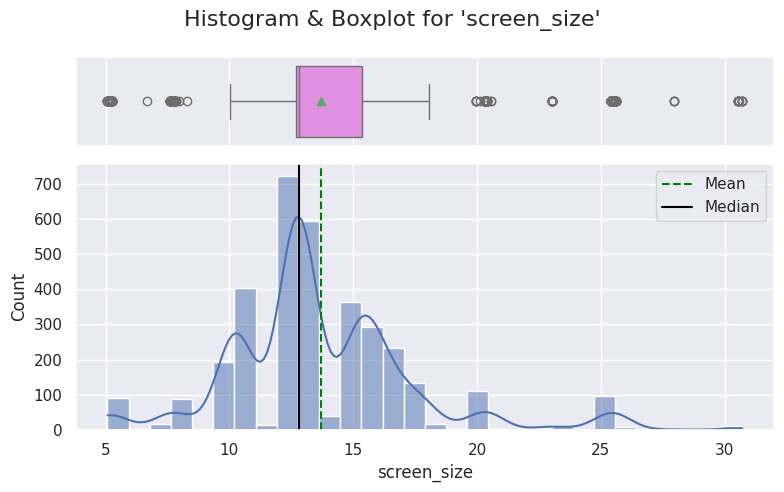

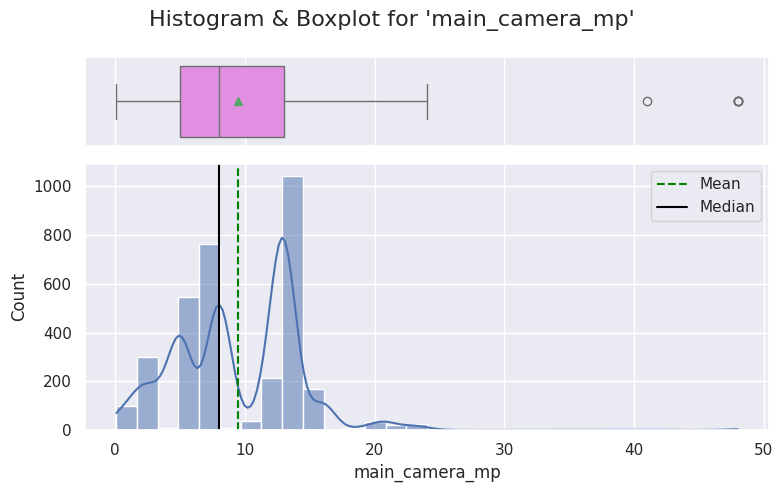

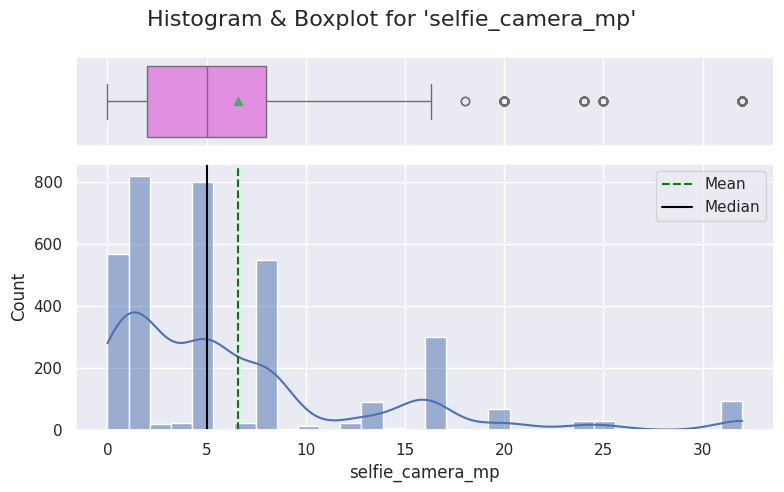

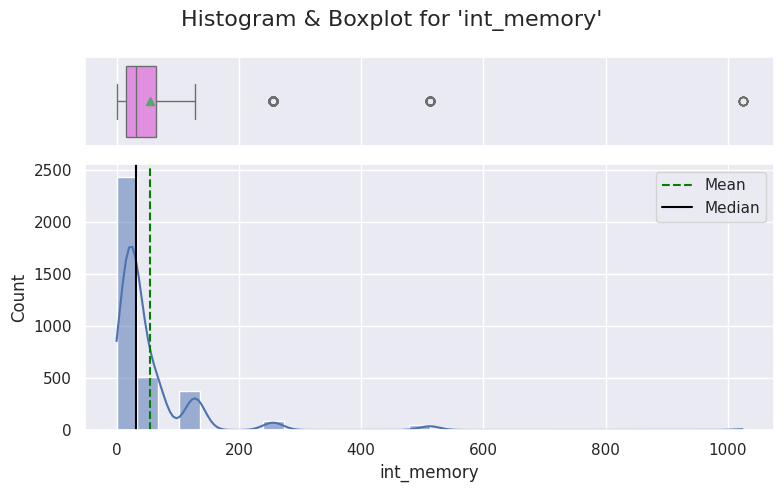

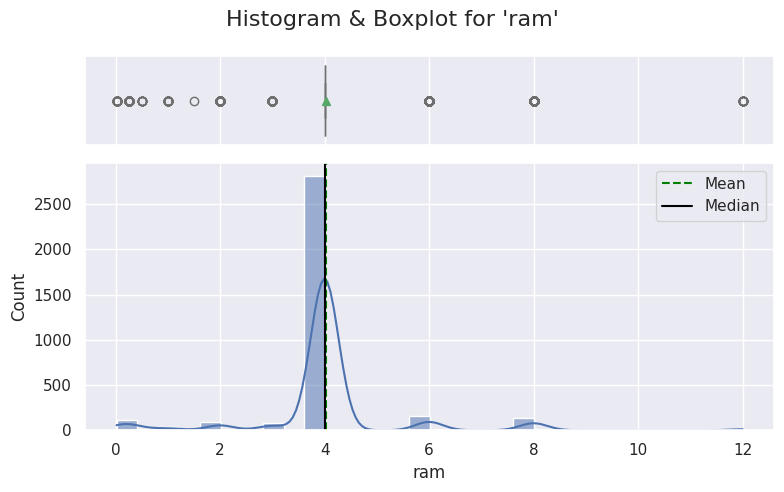

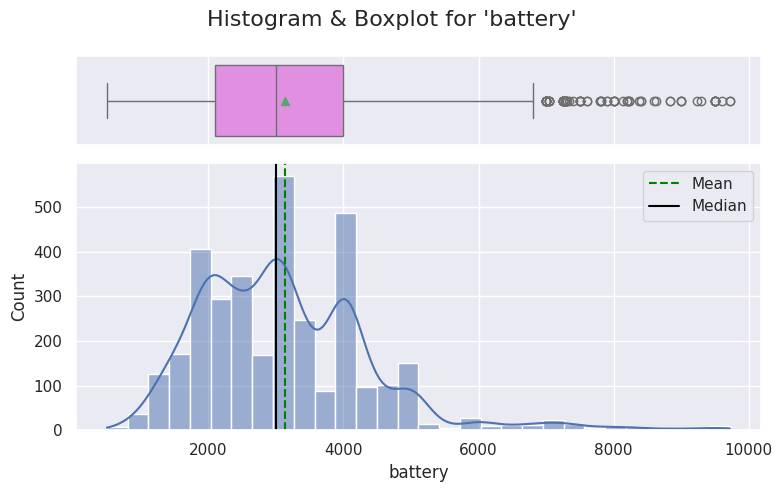

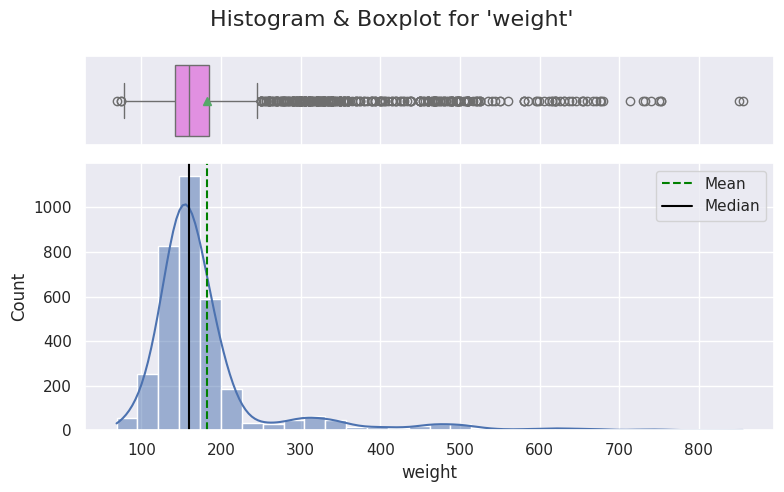

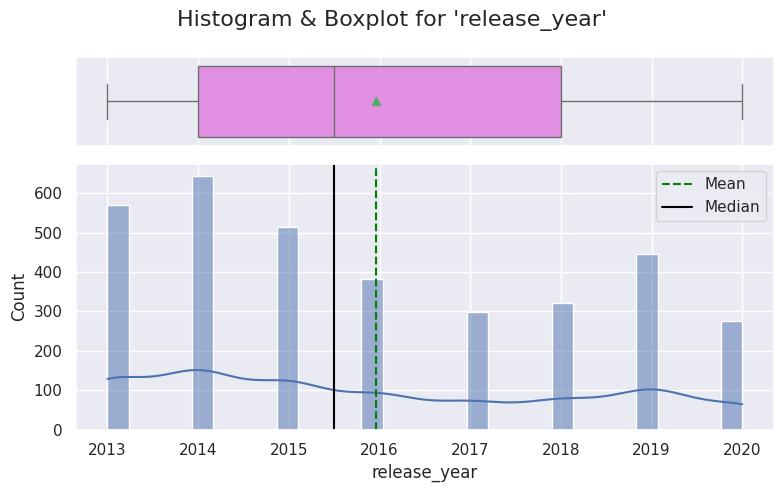

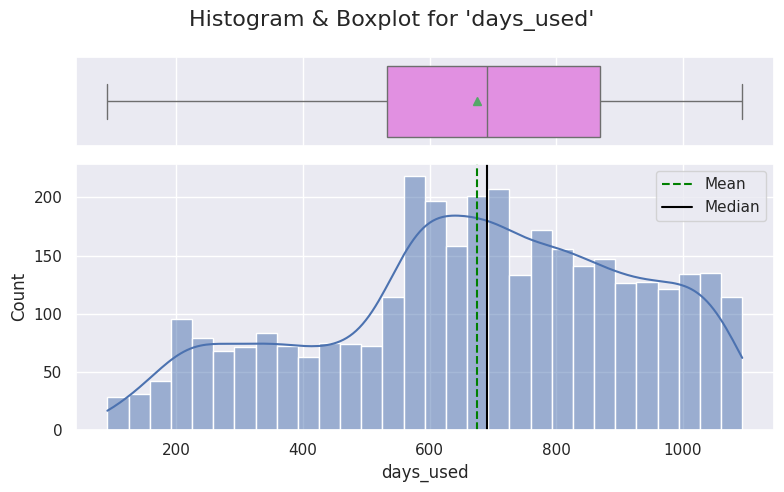

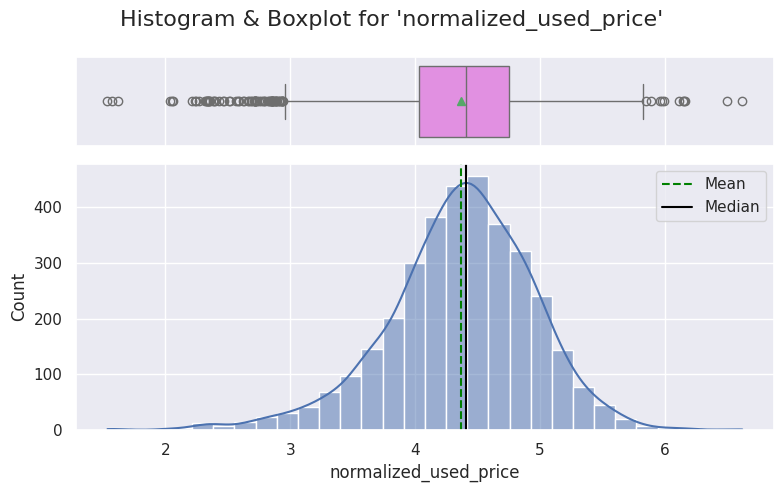

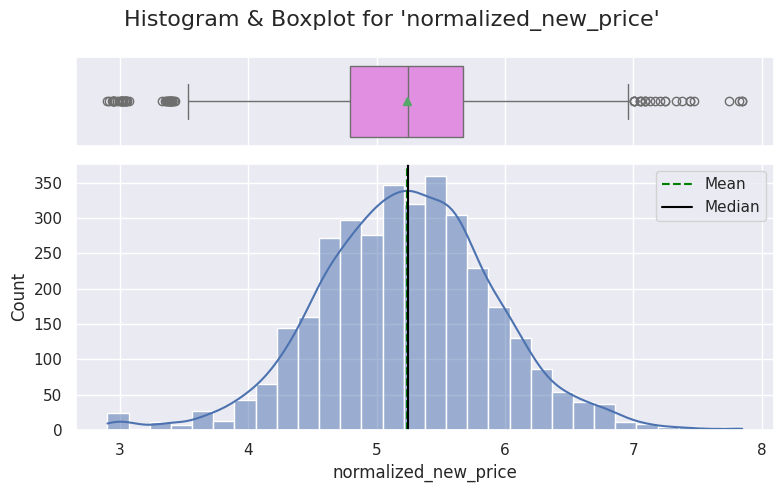

In [15]:
auto_histogram_boxplot(df, kde=True, bins=30)

**Observations:**
- Most of the numeric variables are multi-modal and have skewed distributions with the exception of normalized_used_price and normalized_new_price. In addition, these variables also have plenty of outliers, which could impact our model.

- Normalized_new_price is the closest to the bell curve of the normal distribution.

- Weight and battery are highly skewed to the rightlikely due to heavier devices with bigger batteries, such as tablets.

- The distributions of main_camera_mp and selfie_camera_mp


**Question # 1**: What does the distribution of normalized used device prices look like?


- The distribution of normalized used device prices appears approximately normal
(bell-shaped) and symmetric. The mean and median are closely aligned, suggesting minimal skewness.

- The histogram is dense in the center and tapers off at both ends, while the boxplot shows a few outliers on both the low and high ends.

In [16]:
# Function to create a barplot for a categorical feature, displaying either raw counts or percentages as labels on each bar.

def labeled_barplot(data, feature, perc=False, n=None, title=None):
    """
    Creating a barplot with counts or percentages labeled on top.

    Parameters:
    - data: the DataFrame
    - feature: the categorical column to plot
    - perc: setting True will display percentages instead of counts
    - n: limiting to top n most frequent categories
    """
    # Calculating total number of values for percentage calculation
    total = len(data[feature])

    # Counting the number of unique category levels
    count = data[feature].nunique()

    # Setting figure size based on number of categories (or top n)
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    # Rotating x-axis labels for readability and setting font size
    plt.xticks(rotation=90, fontsize=15)

    # Creating a barplot ordered by frequency
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    # Looping through each bar to annotate with count or percentage
    for p in ax.patches:
        if perc == True:
            # Calculating and formatting percentage label
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            # Using raw count as label
            label = p.get_height()

        # Calculating x and y positions for label placement
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        # Adding the label above the bar
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    # Adding a title to the barplot
    if title is None:
      plt.title(f"Barplot for '{feature}'", fontsize=16)
    else:
      plt.title(title, fontsize=16)


    # Displaying the plot
    plt.show()


In [17]:
# Function to automatically generate labeled barplots for multiple categorical features in a dataset.
# Displays counts or percentages.

def auto_barplots(data, features=None, perc=True, n=None, titles=None):
    """
    Automating labeled barplot creation for multiple categorical features.

    Parameters:
    - data: the DataFrame
    - features: list of column names to plot; if None, selecting categorical columns automatically
    - perc: setting True will display percentages
    - n: limiting to top n categories
    """
    # Selecting categorical features if not provided
    if features is None:
        features = data.select_dtypes(include=["object", "category"]).columns

    # Looping through each feature and generating a plot
    for feature in features:
        # Printing a visual divider
        print("\n" + "=" * 180)
        print(" " * 4)
        print("=" * 180 + "\n")

        # Calling the labeled barplot function
        labeled_barplot(data, feature, perc=perc, n=n)


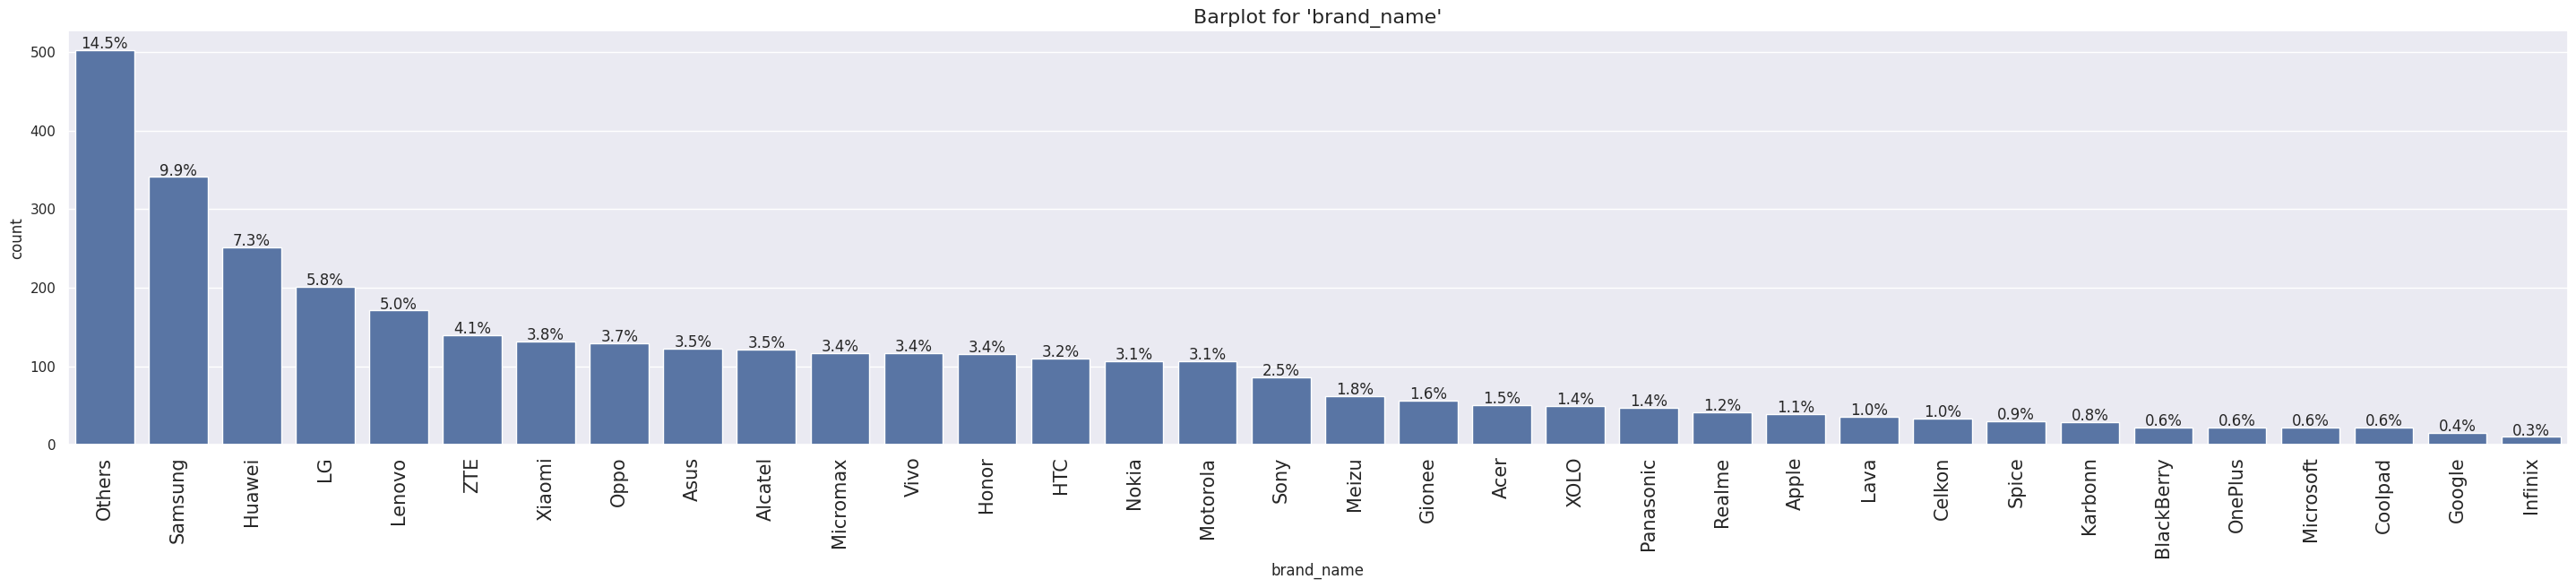

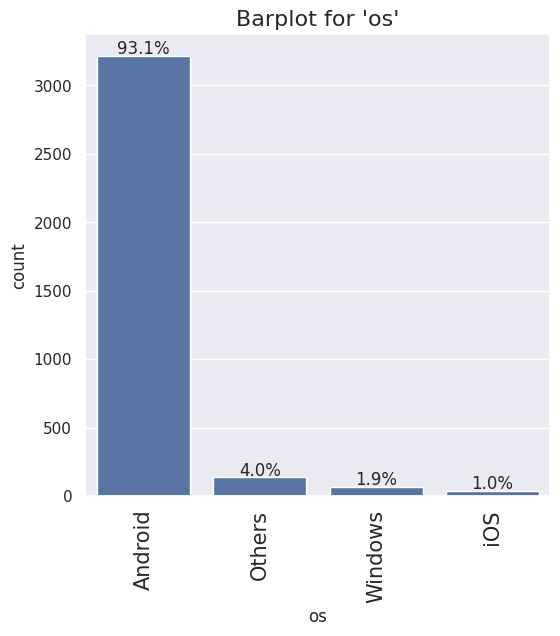

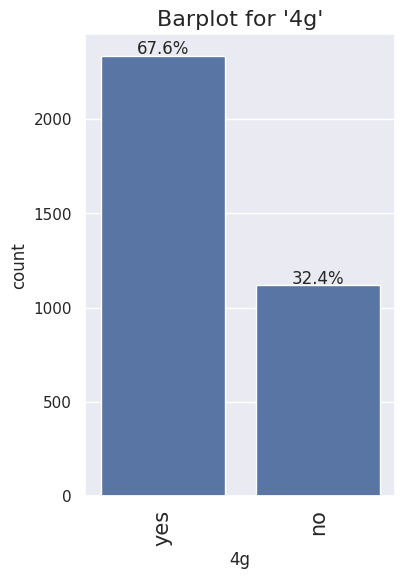

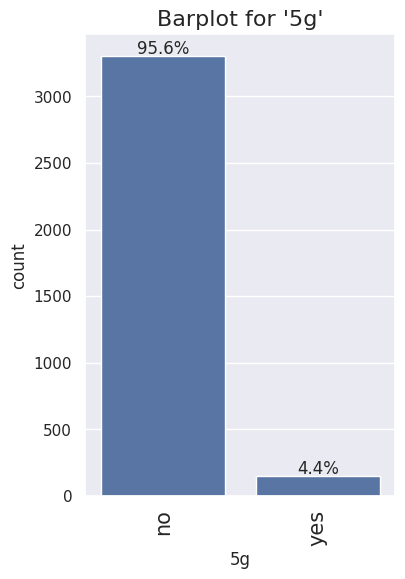

In [18]:
auto_barplots(df)

**Question # 2**: What percentage of the used device market is dominated by Android devices?

- 93% of the used device market is dominated by Androis devices. This needs to be highligted when drawing conclusions and recommendations from results of the model. For instance, the model might have (high) errors in predicting prices for iOS and other OS devices due to underrepresentation in the data.

**Other observations from the barplplots:**
- There are more devices with 4G (67.6%) than 5G (4.4%).
- In terms of brands, Samsung (9.9%), Huawei (7.3%), and LG (5.8%) are the top 3 most common. Despite having the most devices classified as 'Others' (14.5%), it is unknown which brands are in this category.

### 5.2. Bivariate Analysis

**Question # 3**: The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

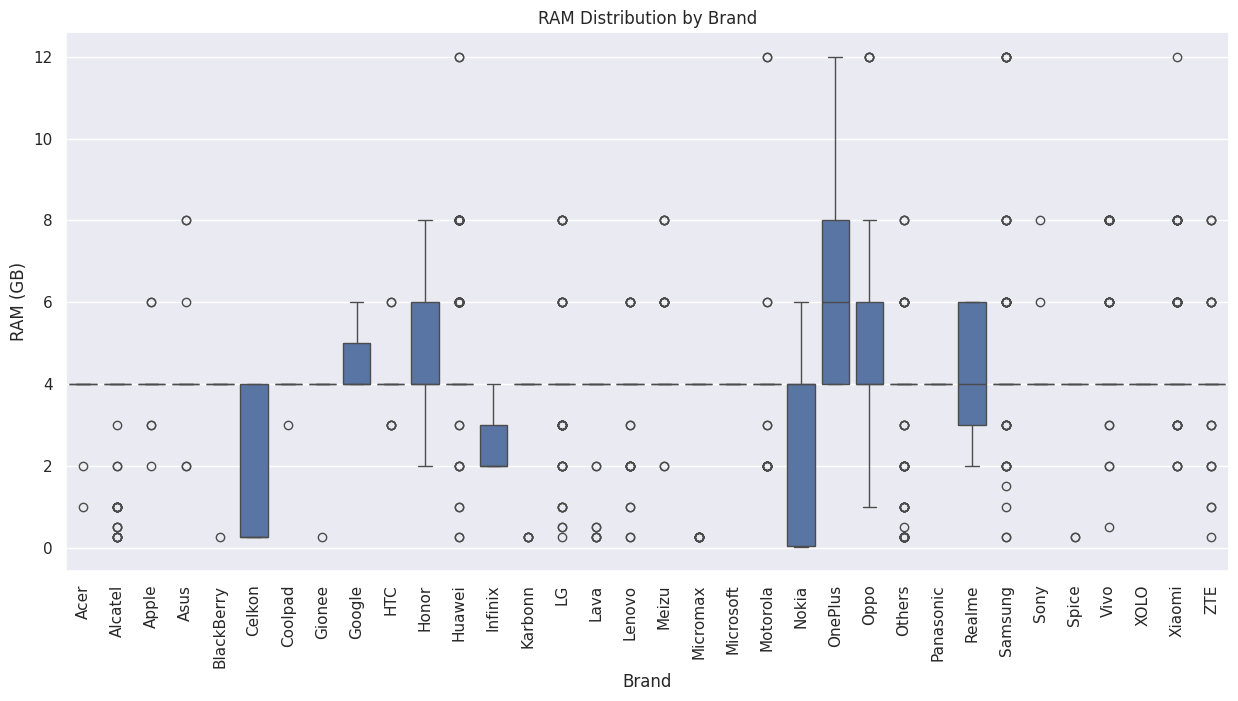

In [19]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x='brand_name', y='ram', order=sorted(df['brand_name'].unique()))
plt.xticks(rotation=90)
plt.title('RAM Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('RAM (GB)')
plt.show()

- The amount of RAM varies significantly between brands and even within brands, indicating a wide range of product tiers (low-end to high-end).

- OnePlus has the highest median RAM values, with a wide interquartile range (IQR), suggesting they offer multiple models targeting different performance levels.

- Nokia, Infinix, and Celkon show very low RAM medians and narrower ranges, indicating they mostly offer budget or older models.

- Samsung and Xiaomi have broad RAM distributions, reflecting a diverse portfolio of both budget and premium devices.

- Brands like Google, Honor, and Realme fall around or slightly above the overall average RAM (as shown by the dashed line), with moderate variation in models.

- Outliers (e.g., 12 GB RAM) in brands like Huawei, Oppo, Motorola, Samsung, Xiaomi suggest presence of flagship or gaming models.

**Question # 4**: A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

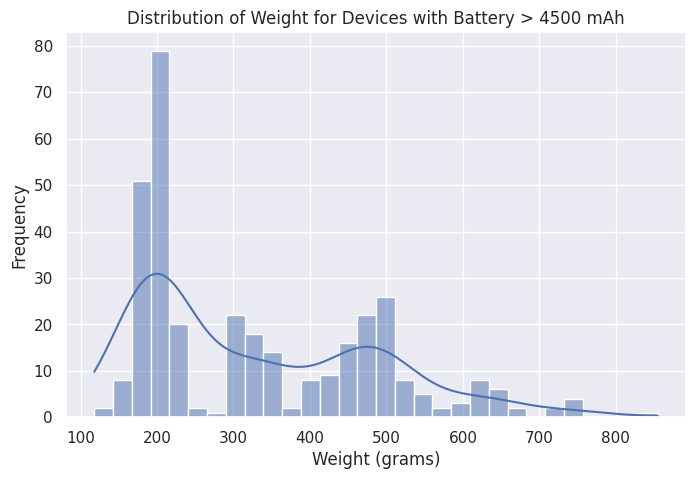

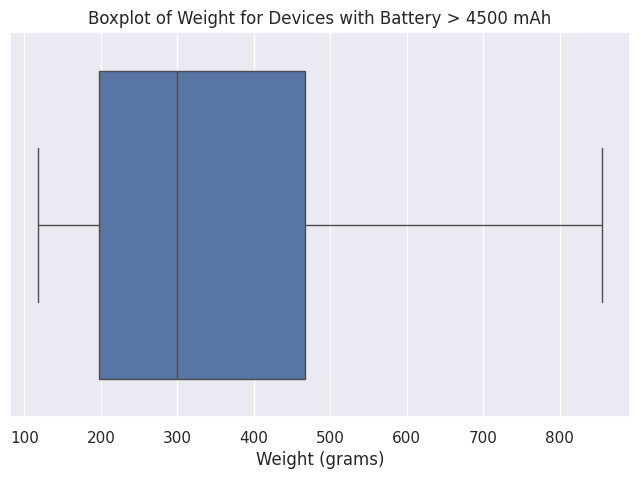


Descriptive Statistics for Weight (Battery > 4500 mAh):
count    341.00
mean     332.28
std      155.50
min      118.00
25%      198.00
50%      300.00
75%      467.00
max      855.00
Name: weight, dtype: float64


In [20]:
# Filtering  devices with batteries > 4500 mAh
df_large_battery = df[df['battery'] > 4500]

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df_large_battery, x='weight', kde=True, bins=30)
plt.title('Distribution of Weight for Devices with Battery > 4500 mAh')
plt.xlabel('Weight (grams)')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_large_battery, x='weight')
plt.title('Boxplot of Weight for Devices with Battery > 4500 mAh')
plt.xlabel('Weight (grams)')
plt.show()

# Descriptive Statistics Summary: Weights of Devices with Batteries > 4500 mAh
print("\nDescriptive Statistics for Weight (Battery > 4500 mAh):")
print(df_large_battery['weight'].describe().round(2))

**Observations:**
- The median weight is 300g, and the mean is slightly higher at 332g, indicating a right-skewed distribution.

- IQR ranges from 198g to 467g, showing substantial variation even among devices with large batteries.

- Weight spans from 118g to 855g, reflecting differences in device types (phones vs. tablets) and builds.

- The right skew and extended upper range imply that a few bulkier devices (i.e., tablets) raise the average without being outliers.

- This variation in weight suggests design and usability trade-offs and could be a valuable predictor in pricing models.

**Question # 5**: Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [21]:
# Plots a bar chart of device counts by brand after applying a filter to the dataset (with labels and formatting).

def brand_barplot(data, filter_condition, title):
    """
    Creates a labeled barplot of device counts by brand after applying a filter.

    Parameters:
    - data: DataFrame to use
    - filter_condition: boolean mask to filter the DataFrame
    - title: Title of the barplot
    """

    # Filtering the DataFrame based on the condition
    filtered_df = data[filter_condition]

    # Counting devices per brand
    brand_counts = filtered_df['brand_name'].value_counts()

    # Plotting
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=brand_counts.index, y=brand_counts.values)

    # Annotating bars with values
    for i, count in enumerate(brand_counts.values):
        ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)

    # Setting labels and title
    plt.title(title, fontsize=16)
    plt.xlabel('Brand', fontsize=14)
    plt.ylabel('Number of Devices', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

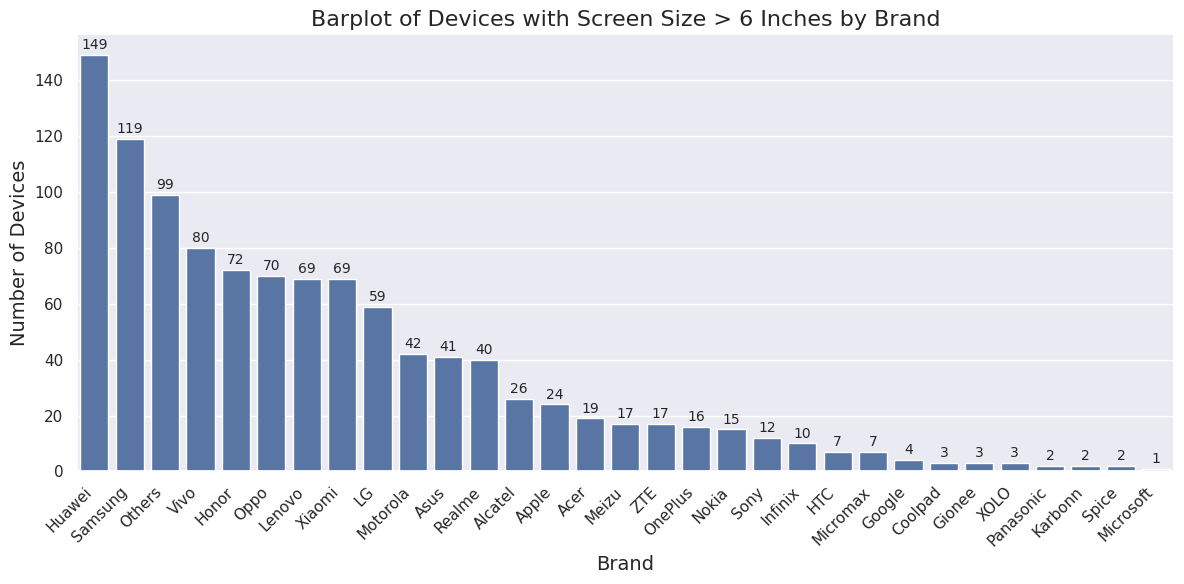

In [22]:
brand_barplot(
    data=df,
    filter_condition=df['screen_size'] > 6 * 2.54,
    title='Barplot of Devices with Screen Size > 6 Inches by Brand'
)

- With hundreds of devices across more than 30 brands have screen sizes greater than 6 inches, there seems to be an industry-wide adoption of larger screens.

- Huawei (149), Samsung (119), and Vivo (80) lead in the number of large-screen devices, suggesting these brands cater heavily to entertainment-focused or multimedia users. The “Others” category accounts for 99 devices, but its exact composition is not specified, limiting brand-level detail for this group.

- Other brands with significant contributions include Honor, Oppo, Lenovo, and Xiaomi, each offering more than 69 such devices.

- On the other end, some brands have very few large-screen devices, such as Microsoft, Spice, Karbonn, and Panasonic, with 2 or fewer models each.

- This distribution suggests that while larger screens are widely adopted, brand strategies differ, with some focusing more on compact or entry-level devices. Hence, screen size may be impact or indicate pricing.

**Question # 6**: A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

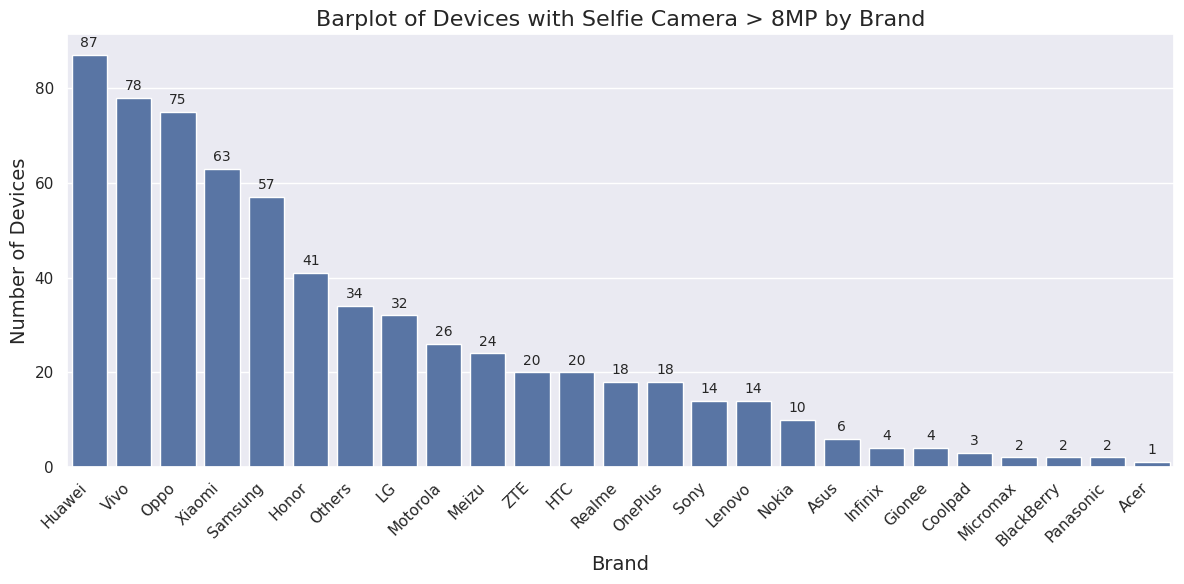

In [23]:
brand_barplot(
    data=df,
    filter_condition=df['selfie_camera_mp'] > 8,
    title='Barplot of Devices with Selfie Camera > 8MP by Brand'
)

- The distribution is heavily concentrated among a few leading brands, with Huawei (87), Vivo (78), and Oppo (75) topping the list.

- Other major contributors include Xiaomi (63), Samsung (57), and Honor (41) — all of which offer a broad range of models with high-resolution front cameras.

- Toward the lower end, brands like Acer, Panasonic, BlackBerry, and Micromax each contribute very few devices (≤2), suggesting a focus on budget models where high-resolution selfie cameras are not prioritized.

- Well-known brands like Apple and Microsoft are absent from the plot, suggesting they did not offer devices with selfie cameras above 8 MP in 2021 or earlier, when the data was collected.

- Overall, the data shows that high-MP selfie cameras are a key selling point for top Android manufacturers, especially those targeting markets with strong demand for camera performance.

**Rear cameras:**

Since rear cameras typically offer higher resolution than front-facing ones, we set a higher threshold of 16MP for this analysis.

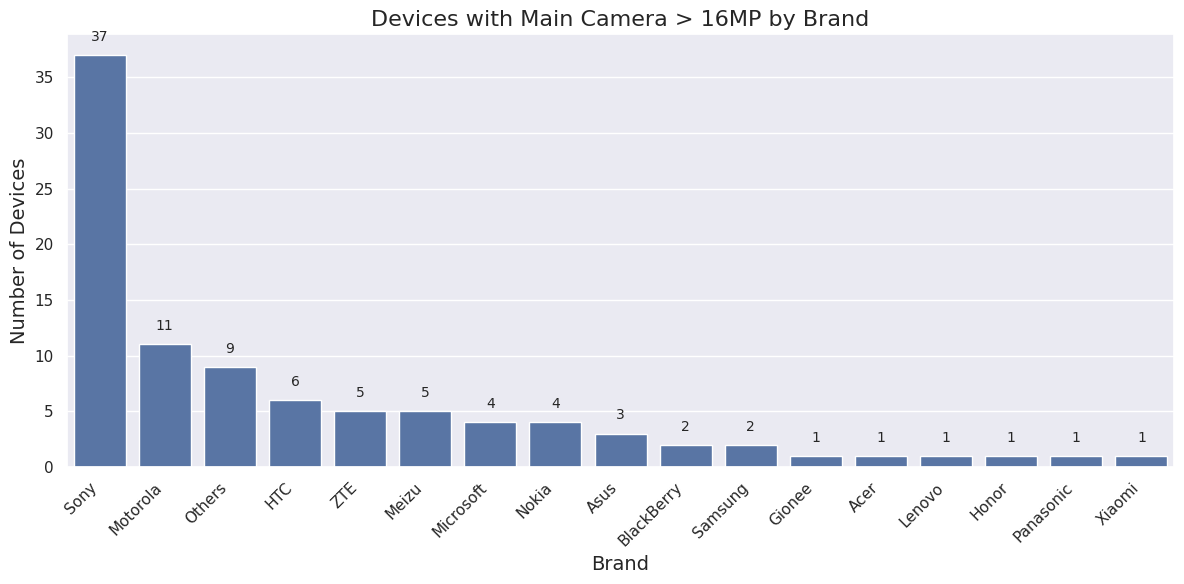

In [24]:
brand_barplot(
    data=df,
    filter_condition=df['main_camera_mp'] > 16,
    title='Devices with Main Camera > 16MP by Brand'
)

- Selfie cameras >8MP were more widely adopted across brands in 2021, reflecting trends in consumer behavior (e.g., selfies, video calls).

- Main cameras >16MP remained niche, led mainly by Sony and a few others, likely due to cost, technology constraints, or market positioning.



**Question # 7**: Which attributes are highly correlated with the normalized price of a used device?


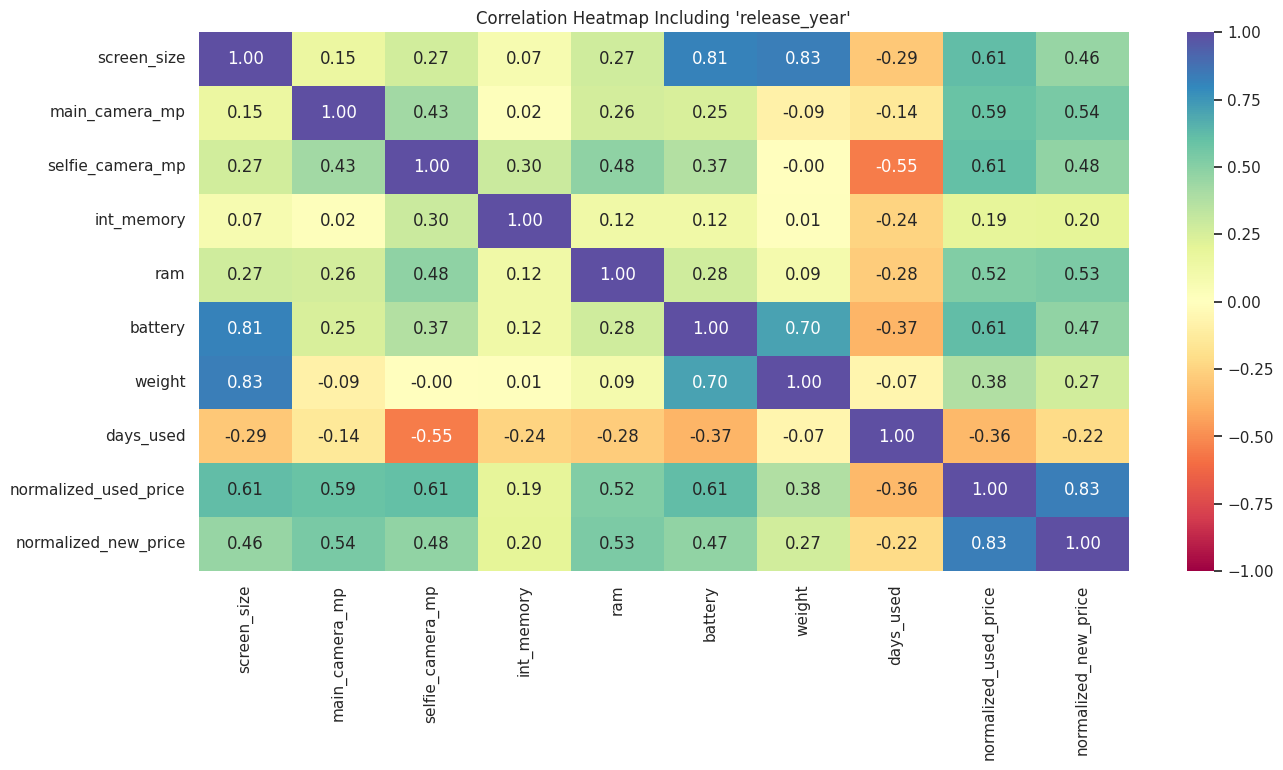

In [25]:
# Plotting correlation heatmaps without release_year

# Selecting numeric variables
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# Dropping release_year since it's a temporal variable and I'm planning to feature engineer it.
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title("Correlation Heatmap Including 'release_year'")
plt.show()

- Based on the heatmap above, only one attribute is highly correlated to the normalized_used_price, which is the normalized_new_price. This means the price of used devices in the market are likely impacted by the original price of the phone.

- Other variables that showed moderate positive correlation with the target variable are:
  - screen size (0.61)
  - battery (0.61)
  - selfie camera (0.61)
  - main camera (0.59)
  

**Additional Observations:**
- There appears to be high multicollinearity among the following device specs, suggesting redundant information:
  - screen_size and weight: 0.83
  - screen_size and battery: 0.81
  - battery and weight: 0.70

- Internal memory (int_memory) has low correlation with price and other features (mostly around 0.1 to 0.3).It may be less impactful as a standalone feature for modeling.

- Days_used can be a meaningful depreciation signal as it is negatively correlated with the target variable, but it overlaps somewhat with age-related features like camera specs (negatively correlated with selfie_camera_mp: -0.55).

**How does price of used devices varies across the years?**

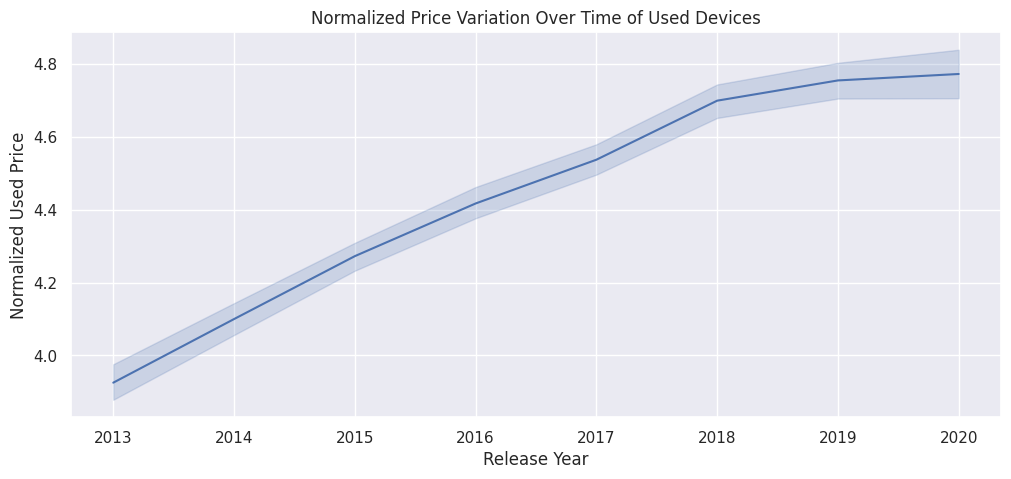

In [26]:
# A lineplot for release_year and normalized_used_price
plt.figure(figsize=(12, 5))
sns.lineplot(data =df, x = 'release_year', y = 'normalized_used_price')
plt.xlabel('Release Year')
plt.ylabel('Normalized Used Price')
plt.title('Normalized Price Variation Over Time of Used Devices')
plt.show()

- The price of used devices increases steadily with newer release years, indicating that newer models retain higher resale value over time.

**How do the prices vary for used phones and tablets offering 4G and 5G networks?**

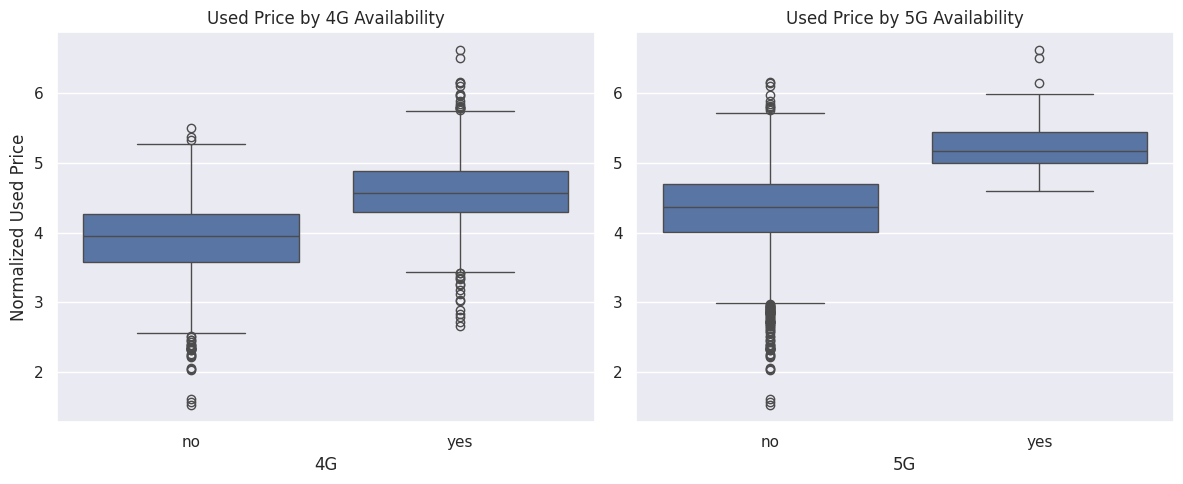

In [27]:
# Set up the figure with 2 plots side-by-side
plt.figure(figsize=(12, 5))

# 4G plot (No first, then Yes)
plt.subplot(1, 2, 1) #first of two side-by-side plots.
sns.boxplot(data=df, x="4g", y="normalized_used_price", order=["no", "yes"])
plt.title("Used Price by 4G Availability")
plt.xlabel("4G")
plt.ylabel("Normalized Used Price")

# 5G plot (No first, then Yes)
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="5g", y="normalized_used_price", order=["no", "yes"])
plt.title("Used Price by 5G Availability")
plt.xlabel("5G")
plt.ylabel("")

# Display both plots nicely
plt.tight_layout()
plt.show()


- Used devices that support 4G and 5G networks have higher normalized prices compared to those that don't.

- 4G-enabled devices show a higher median price and narrower spread than non-4G ones.

- 5G-enabled devices have the highest resale prices, with a clearly elevated median and tighter distribution, suggesting they are newer and more premium.

## 6. Data Preprocessing

There are several missing values in the dataset, specifically:
- 179 in main_camera_mp (multimodal and long tail to the right)
- 2 in selfi_camera_mp (multimodal and long tail to the right)
- 4 in int_memory (long tail to the right)
- 4 in ram (appears multimodal)
- 6 in battery (long tail to the right)
- 7 in weight (long tail to the right)

Based on the univariate analysis, several continuous variables exhibited right-skewed distributions (long tails to the right), indicating the presence of outliers. In such cases, it is generally more appropriate to impute missing values using the median rather than the mean, as the median is less sensitive to extreme values and better represents the central tendency in skewed distributions.

### 6.1. Imputation of Missing Values

In [28]:
# Creating a copy of the data
df1 = df.copy()

In [29]:
# Checking for missing values
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


In [30]:
cols_impute = ["main_camera_mp","selfie_camera_mp","int_memory","ram","battery","weight"]

# Imputing missing values in cols_impute with median by grouping the data on release year and brand name
for col in cols_impute:
    df1[col] = df1[col].fillna(value=df1.groupby(['brand_name','release_year'])[col].transform("median"))

# Checking missing values after imputing the above columns
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,0
ram,0
battery,6


- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [31]:
cols_impute = ["main_camera_mp","selfie_camera_mp","battery","weight"]

# Imputing the missing values in cols_impute with median by grouping the data on brand name
for col in cols_impute:
    df1[col] = df1[col].fillna(value=df1.groupby(['brand_name'])[col].transform("median"))

# Checking missing values after imputing the above columns
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,10
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [32]:
# Imputing the data with median
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

# Checking missing values after imputing the above columns
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,0
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


### 6.2. Feature Engineering

In [33]:
df1['release_year'].max()

2020


- We will reate a new column `years_since_release` from the `release_year` column, since the former will make the model more stable, interpretable, and time-agnostic.
- We will consider 2021 (the year of data collection) as the baseline.
- We will drop the `release_year` column.

In [34]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
print(df1["years_since_release"].describe().round(2))

count    3454.00
mean        5.03
std         2.30
min         1.00
25%         3.00
50%         5.50
75%         7.00
max         8.00
Name: years_since_release, dtype: float64


### 6.3. Examining Outliers

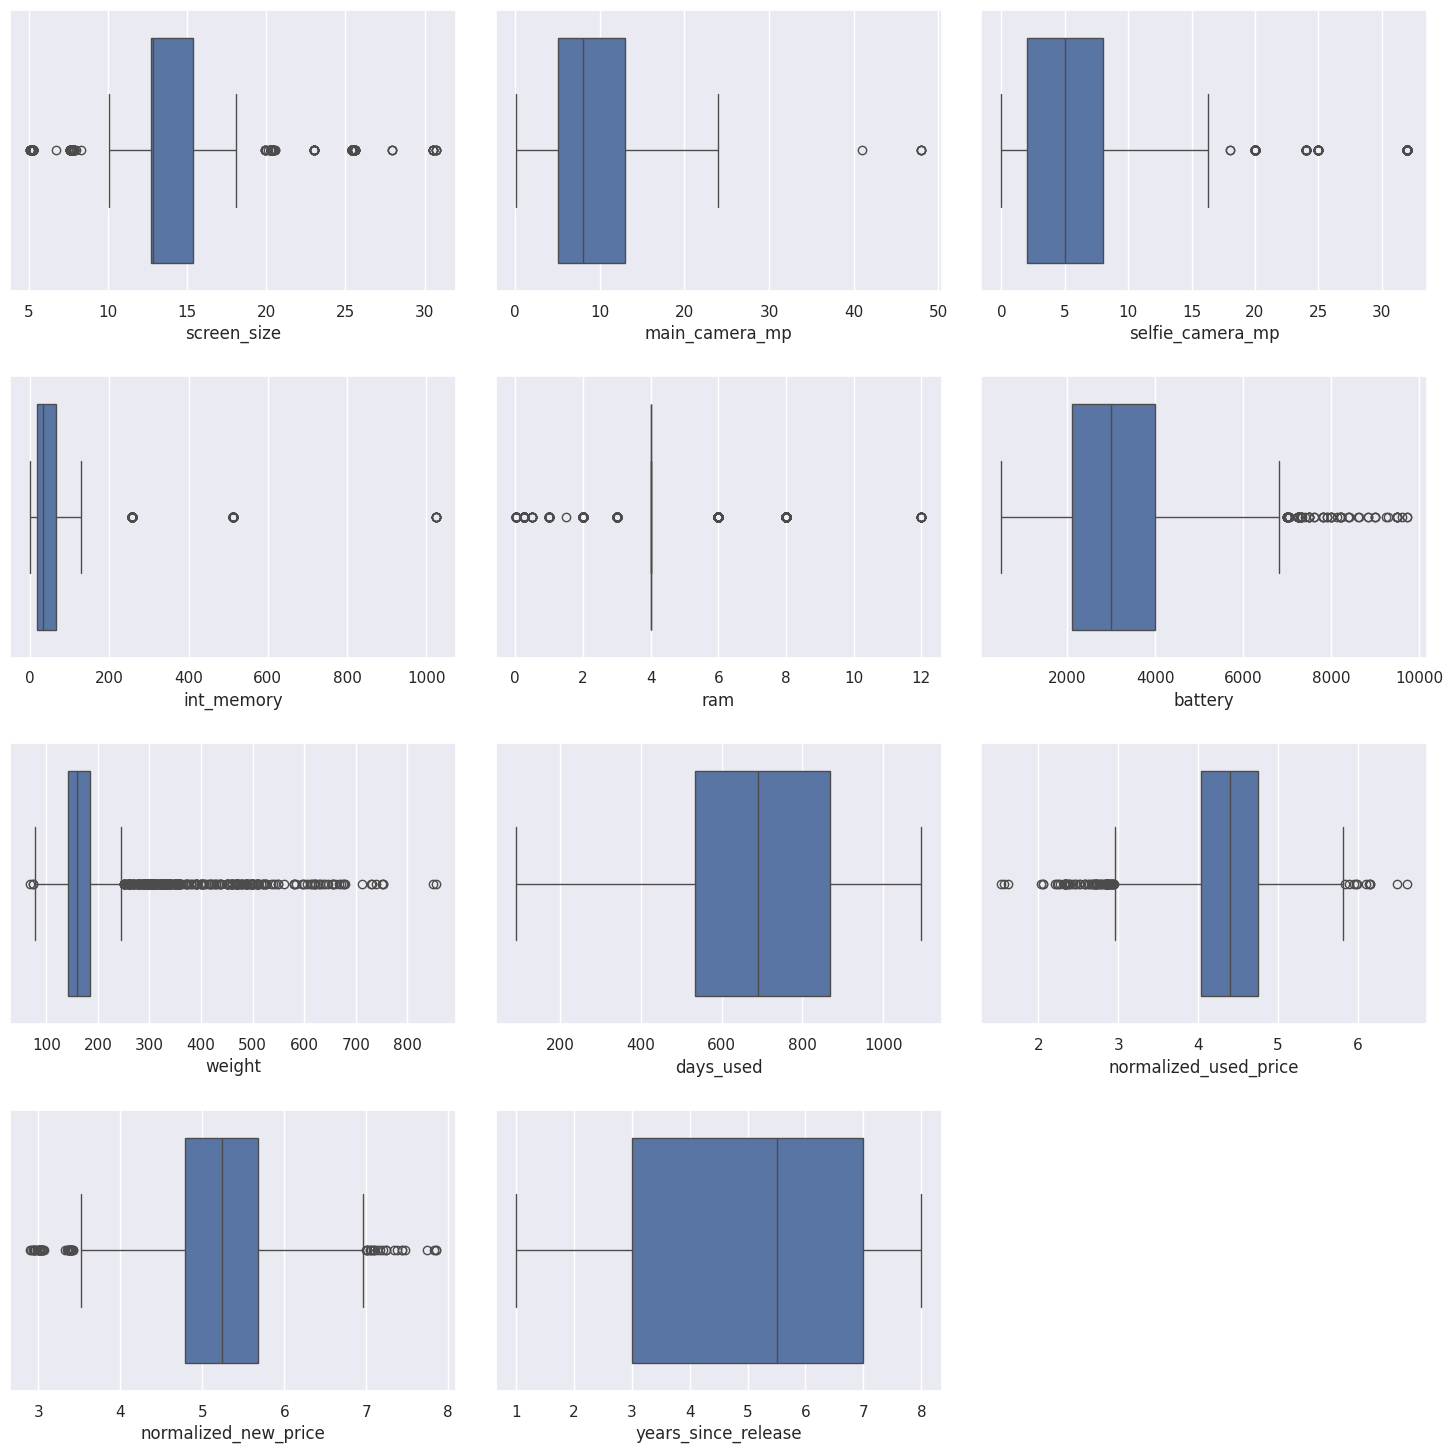

In [35]:
# Outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

**Observations from the Boxplots:**
- Several numeric features in the dataset show the presence of outliers, primarily on the higher end of the distribution: ram, battery, main_camera_mp, selfie_camera_mp, and int_memory.

- These outliers likely correspond to high-end or specialized devices, such as premium smartphones or tablets with advanced hardware.

- weight and screen_size also show some larger-than-usual values, possibly due to heavier or larger tablet models.

- These extreme values can skew statistical summaries and impact model performance. For now, we are noting them down as potential high-leverage points that may require removal or transformation.

### 6.4. Data Preparation for Modeling

* Our goal is to **predict the normalized price of used devices**.
* Before building the model, we'll **encode the categorical variables** to make them suitable for regression.
* We'll then **split the dataset into training and testing sets** to evaluate the model's performance reliably.
* A **Linear Regression model** will be trained on the training set, and its **performance will be assessed on the test set**.


In [36]:
# Defining the dependent and independent variables
X = df1.drop(['normalized_used_price'], axis=1)
y = df1['normalized_used_price']

print(X.head())
print('===================================================================')
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [37]:
# Creating dummy variables for independent features
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1,...,False,False,False,False,False,False,False,False,True,False
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1,...,False,False,False,False,False,False,False,False,True,True
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1,...,False,False,False,False,False,False,False,False,True,True
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1,...,False,False,False,False,False,False,False,False,True,True
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1,...,False,False,False,False,False,False,False,False,True,False


In [38]:
# Adding the intercept to the data
X = sm.add_constant(X)

In [39]:
# Splitting the data in 70:30 ratio for train to test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [40]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## 7. EDA after Data Manipulations

- After preprocessing, we’ll re-examine the data to confirm it's properly prepared before fitting the model.

### 7.1. Missing value detection

In [41]:
# Final missing value check
X_train.isnull().sum().sort_values(ascending=False)


,0
const,0
screen_size,0
main_camera_mp,0
selfie_camera_mp,0
int_memory,0
ram,0
battery,0
weight,0
days_used,0
normalized_new_price,0


- No missing values found.

### 7.2. Univariate Analysis

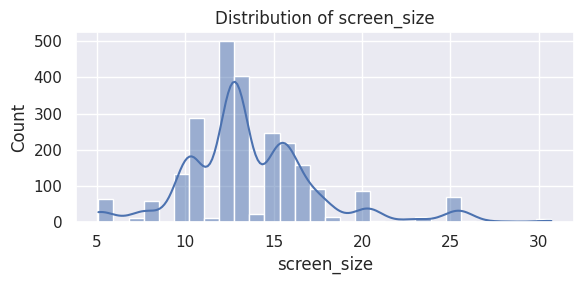

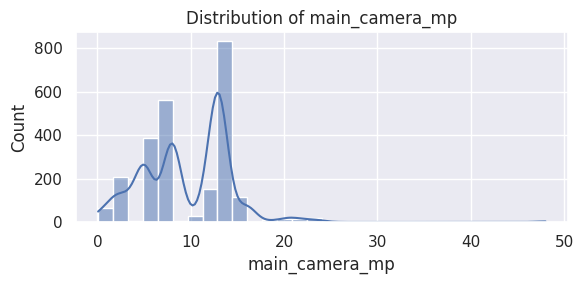

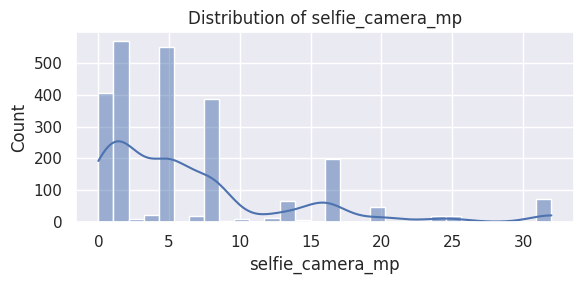

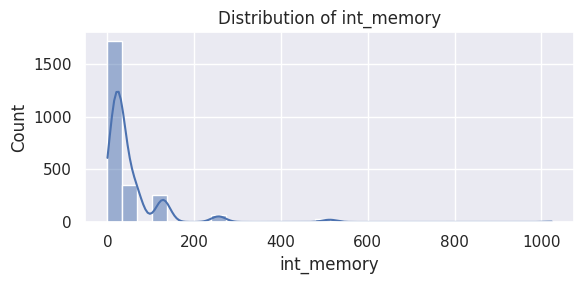

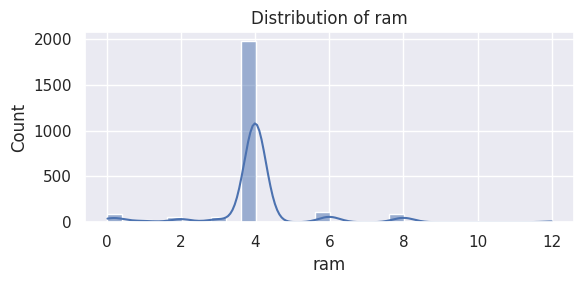

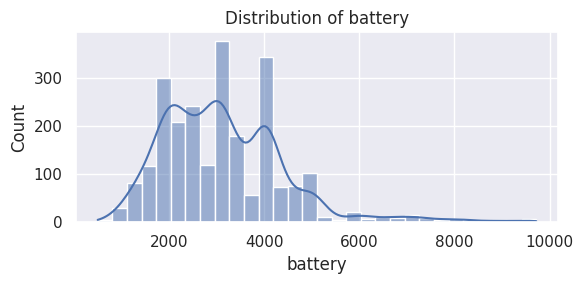

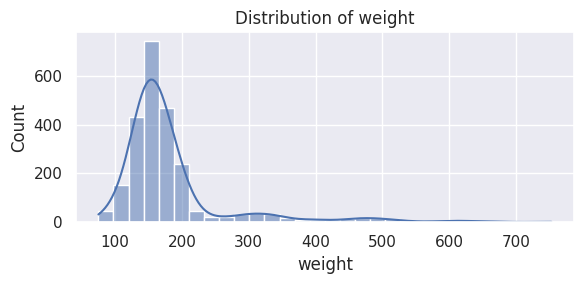

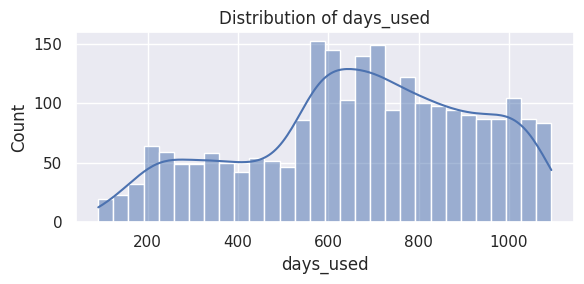

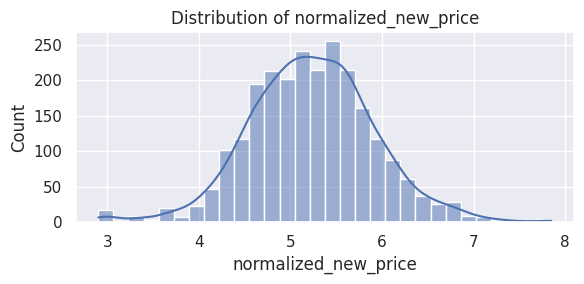

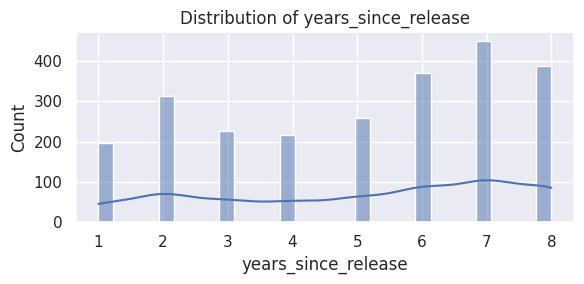

In [42]:
# Defining numeric_cols by selecting numeric columns from X_train
numeric_cols = X_train.select_dtypes(include=np.number).columns

# Excluding dummy variables since we only want only continuous ones
continuous_cols = [col for col in numeric_cols if X_train[col].nunique() > 2]

# Automating histograms
for col in continuous_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(X_train[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

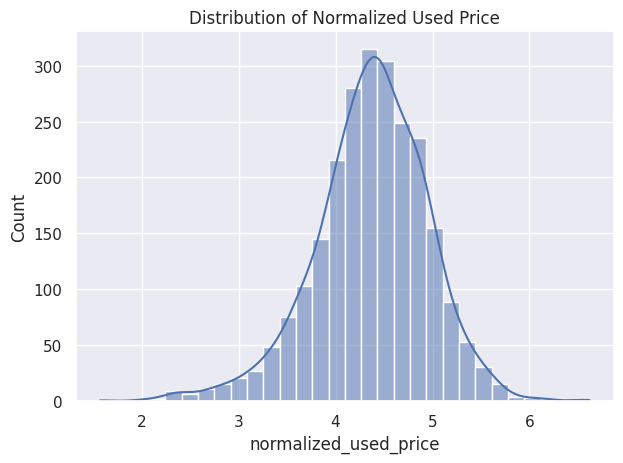

In [43]:
sns.histplot(y_train, bins=30, kde=True)
plt.title(f'Distribution of Normalized Used Price')
plt.tight_layout()
plt.show()

**After Data Pre-processing Insights (Univariate Analysis):**

- The post-imputation distributions remain largely similar to their original distributions, confirming that median imputation was a suitable choice, especially for right-skewed and multi-modal variables. The process did not introduce artificial peaks or distort the underlying shape of the data, preserving the integrity of the variables for subsequent modeling.

### 7.3. Bivariate Analysis

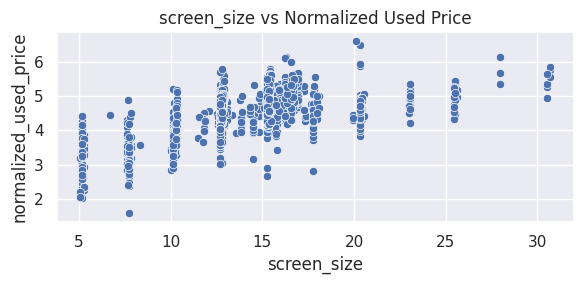

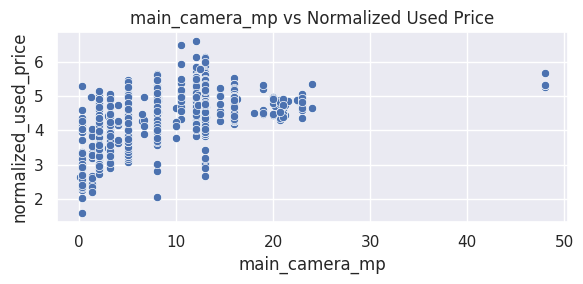

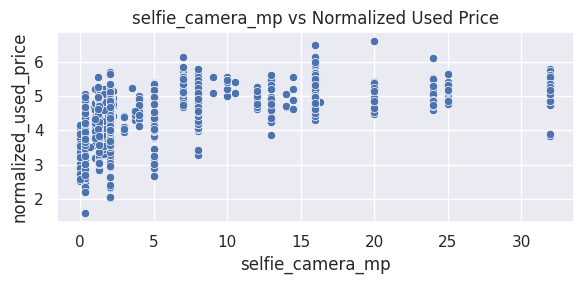

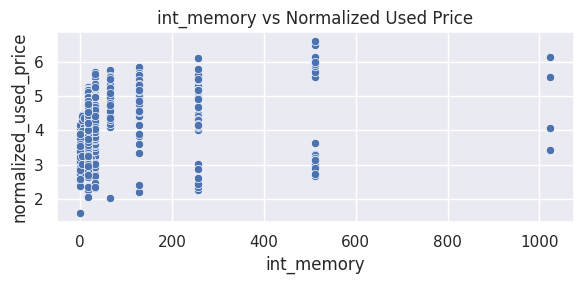

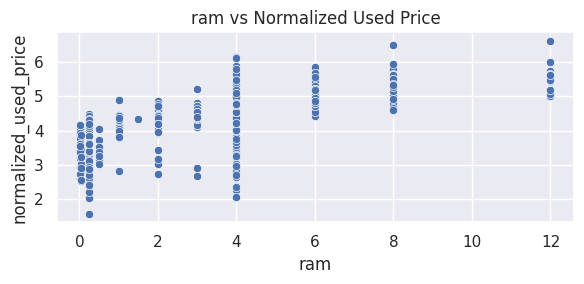

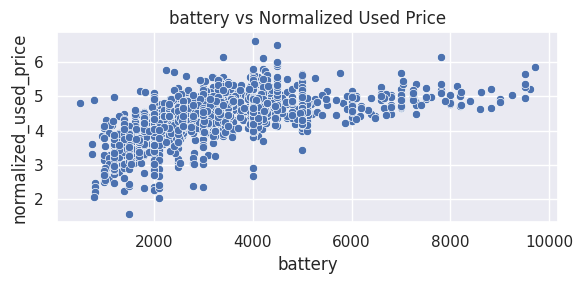

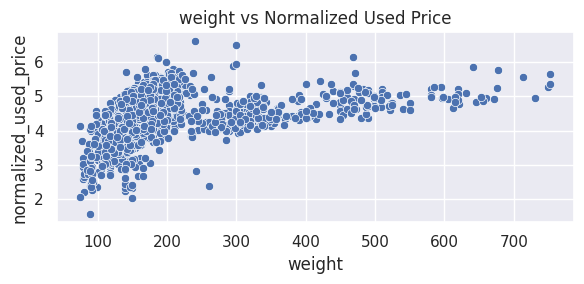

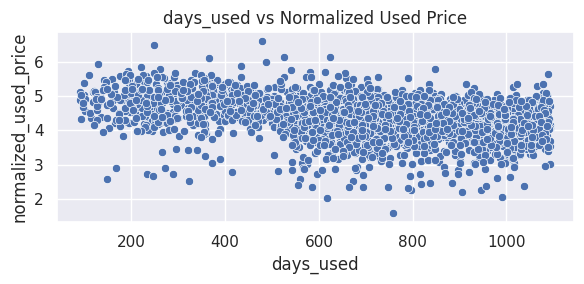

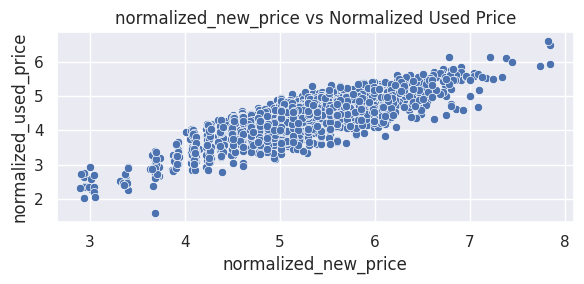

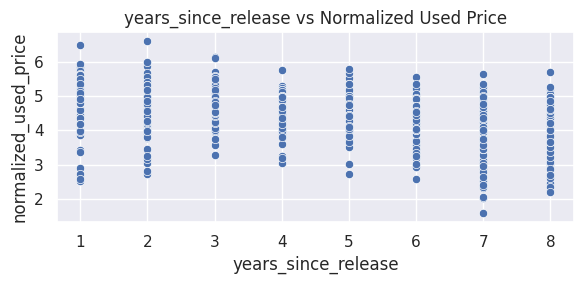

In [44]:
# Automating scatter plots
for col in continuous_cols:
    plt.figure(figsize=(6, 3))
    sns.scatterplot(x=X_train[col], y=y_train)
    plt.title(f'{col} vs Normalized Used Price')
    plt.tight_layout()
    plt.show()

**Feature Relationships with normalized_used_price**

**Linear or monotonic relationships**
- normalized_new_price: Strong linear relationship — higher new prices predict higher used prices.
- battery: Moderately linear — larger batteries tend to command higher resale value.
- years_since_release: Monotonic negative relationship — older devices are priced lower over time.
- days_used: Slightly curved negative relationship — more usage leads to depreciation.

**Non-linear or saturating relationships**
- screen_size: Positive but clustered — price increases with screen size, but not smoothly.
- main_camera_mp & selfie_camera_mp: Non-linear — price gains flatten beyond approximately 12 MP.
- weight: Curved pattern — price rises with weight up to a point, then plateaus.

**Weak relationships or no clear trend**
- ram: Noisy with a weak upward pattern.
- int_memory: Scattered — limited or no consistent relationship with price.


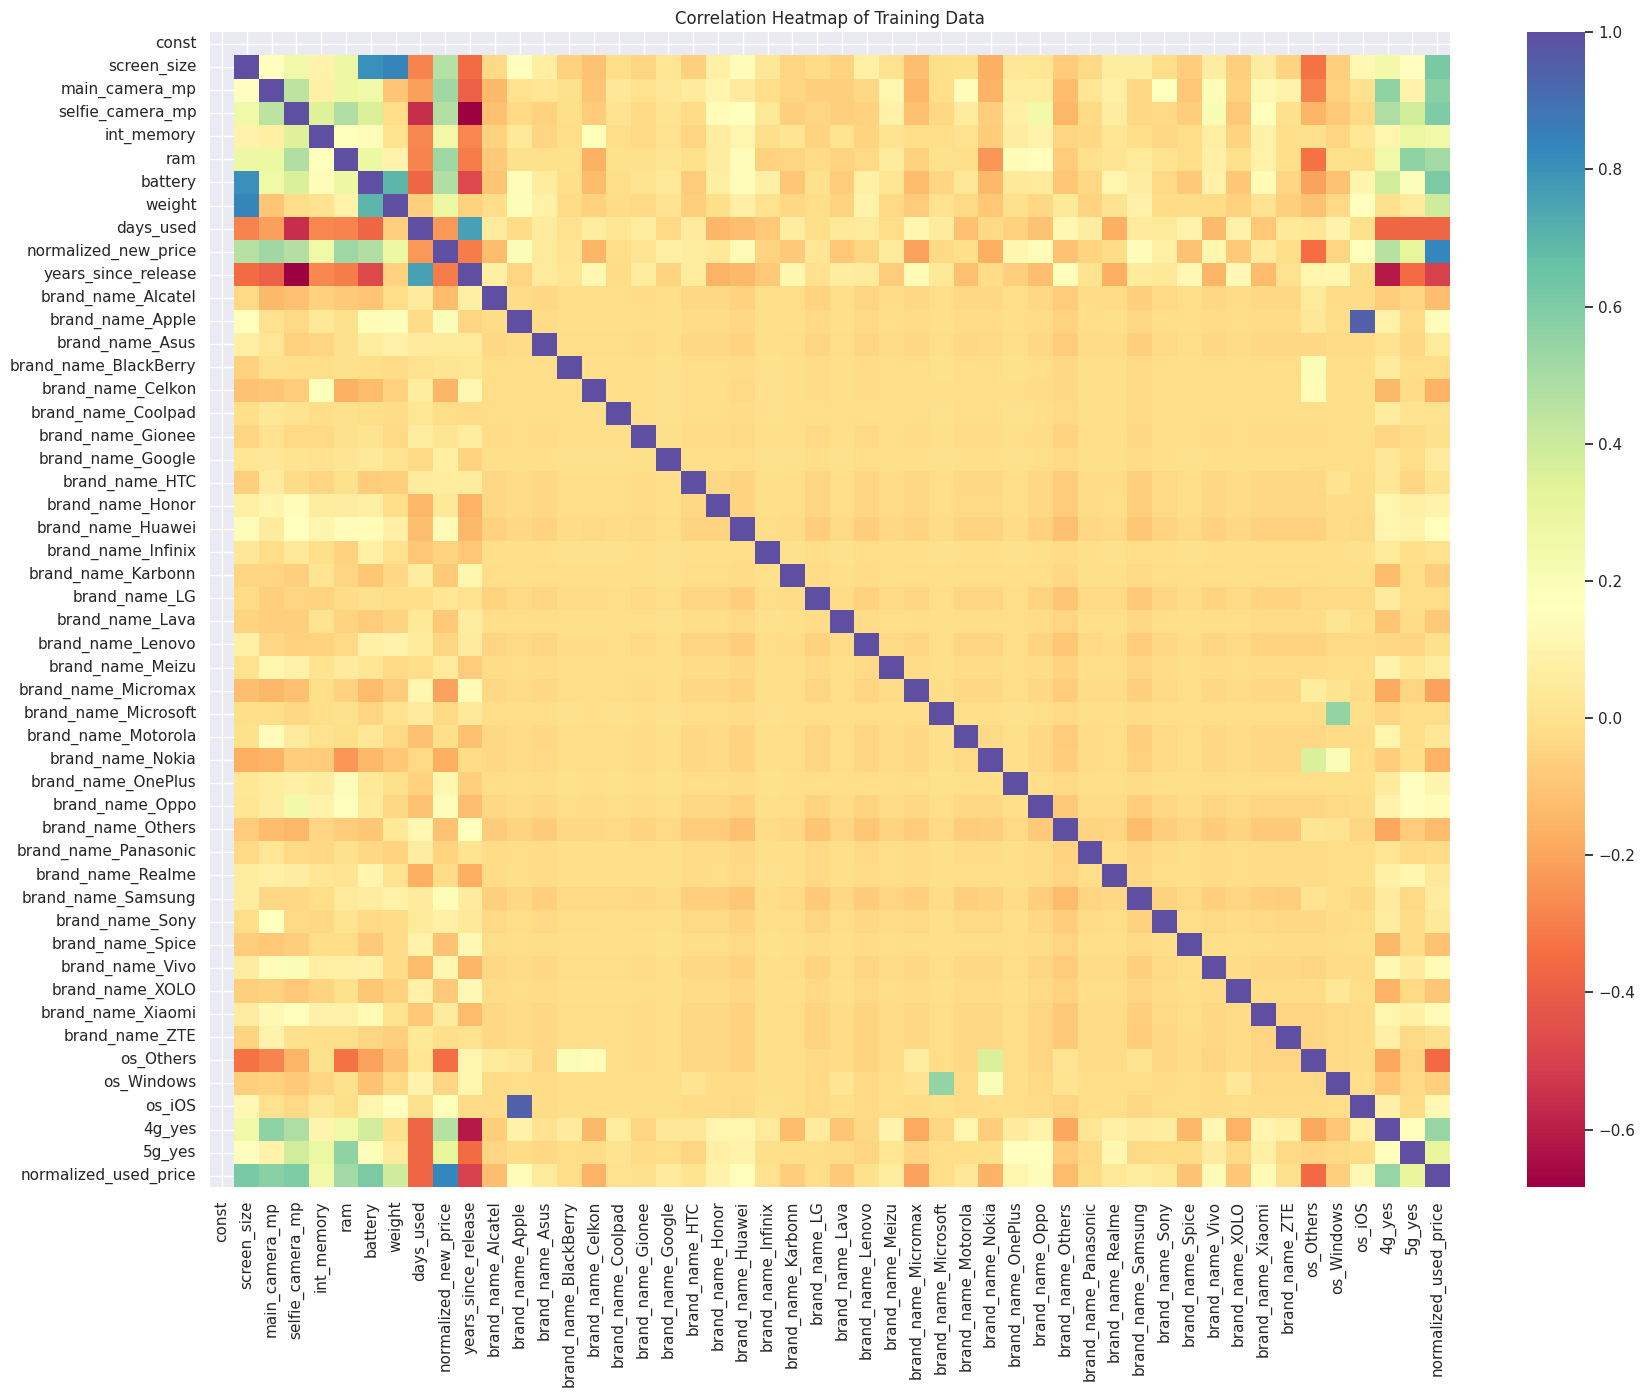

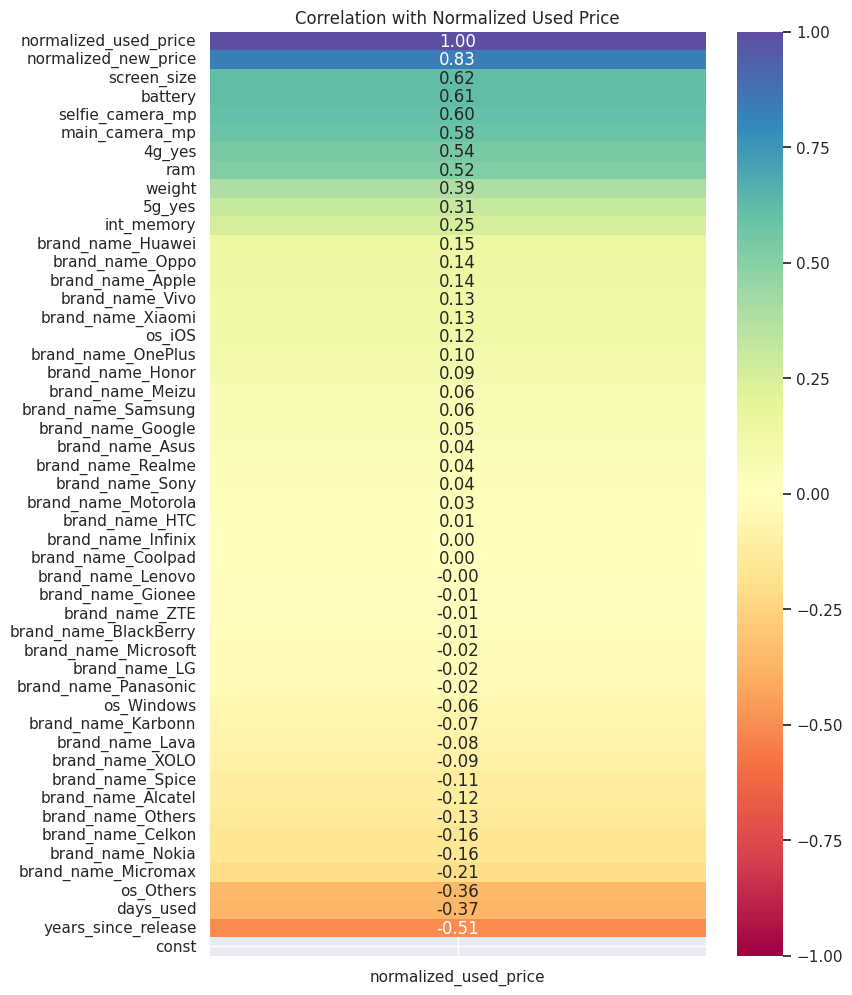

In [45]:
# Correlation heatmap of X_train and y_train data

# Creating a combined dataset for easier correlation analysis
df_train = X_train.copy()
df_train['normalized_used_price'] = y_train

# Calculating the correlation matrix
correlation_matrix = df_train.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='Spectral', fmt=".2f")
plt.title("Correlation Heatmap of Training Data")
plt.show()

# Correlations with the target variable
plt.figure(figsize=(8, 12))
sns.heatmap(correlation_matrix[['normalized_used_price']].sort_values(by='normalized_used_price', ascending=False), annot=True, cmap='Spectral', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation with Normalized Used Price")
plt.show()


In [46]:
# Checking top correlated pairs
corr_matrix = X_train.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = upper_triangle.stack().sort_values(ascending=False)
print(high_corr_pairs.head(10))

brand_name_Apple     os_iOS                 0.952863
screen_size          weight                 0.837496
                     battery                0.806764
days_used            years_since_release    0.760441
battery              weight                 0.696684
selfie_camera_mp     years_since_release    0.684084
years_since_release  4g_yes                 0.612217
ram                  5g_yes                 0.563268
main_camera_mp       4g_yes                 0.561830
selfie_camera_mp     days_used              0.558410
dtype: float64


**After Data Pre-processing Insights (Bivariate Analysis):**

- The top predictors remained consistent, i.e. normalized_new_price (0.83), screen_size (0.62), battery (0.61), selfie_camera_mp (0.60), main_camera_mp (0.58), and ram (0.52) continued to show strong positive correlation with normalized_used_price. Pre-processing did not distort these important relationships.

- One-hot encoding introduced the categorical variables into the correlation heatmap, although they show very weak correlation with the target variable.

- Release_year was replaced by years_since_release, which provides a clearer measure of device age. This new feature shows the strongest negative correlation with normalized_used_price (−0.51), even more than days_used (−0.37), highlighting its effectiveness as a depreciation signal.

- Several feature pairs continue to exhibit high multicollinearity. For example, screen_size remains strongly correlated with both weight (0.84) and battery (0.81), while battery and weight themselves are also correlated (0.70). These physical features likely capture overlapping design characteristics and may need to be reduced.

- Brand_name_Apple and os_iOS show a near-perfect correlation (0.95), revealing redundancy introduced during encoding. Only one of them should be retained to avoid multicollinearity.

- Some new correlations reveal overlap between device specifications and age. For example, selfie_camera_mp is correlated with both years_since_release and days_used, suggesting that older devices tend to have lower-resolution front cameras. Similarly, newer devices are more likely to support 4G and 5G, as shown by moderate correlations with features like years_since_release and RAM.

- Internal memory (int_memory) continues to show weak correlation with both the target variable and other predictors, reinforcing its limited standalone utility in the model.

- Overall, the data pre-processing (e.g., median imputation, one-hot encoding, feature engineering) was effective and non-disruptive — the key variable relationships remain intact for modeling, while also revealing new dependencies that inform smarter feature selection.

## 8. Model Building - Linear Regression

In [47]:
# Fitting OLS Model

X_train = X_train.astype(float)
y_train = y_train.astype(float)

olsmodel1 = sm.OLS(y_train, X_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                           20:37:21   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations:**
Albeit miniscule, the coefficient of days_used is positive, rather than negative. This is counter-intuitive as we would expect that devices used longer typically depreciate more and should sell for less.


### 8.1. Interpreting the Regression Results:

**Evaluation metrics**

**1. R² = 0.845**

  This means that 84.5% of the variance in normalized_used_price can be explained by the current model. Values closer to 1 indicate a better fit.

**2. Adjusted R-squared = 0.842**

  Adjusted R² measures how well the model explains the variability in the target variable, accounting for the number of predictors (currently with 48 predictors). It penalizes for the addition of too many variables, thus, will be compared to subsequent models.

**2. Constant (Intercept) = 1.3156**

  The constant represents the expected normalized price when all predictor values are zero.This serves as the baseline used price in the absence of other features.

**3. Coefficients of predictor variables**

  Each coefficient represents the expected change in the normalized_used_price for a one-unit change in that feature, holding all other variables constant. For example, a unit increase in screen_size increases the target variable by 0.0244.

**4. F-statistic: 268.7 (p-value = 0.000)**

  This indicates that the overall regression model is statistically significant and better than a model with no predictors.

**Statistically insignificant predictors (p > 0.05)**

- Most brand_name and OS dummy variables show no significant effect compared to the base categories.
- Int_memory and days_used also do not have strong individual effects once other variables are accounted for.



### 8.2. Model Performance Check


**We will assess the model’s performance using a variety of evaluation metrics:**

- Built-in metric functions from sklearn will be used to compute RMSE, MAE, and R².

- A custom function will be defined to calculate MAPE and adjusted R².

- To streamline the evaluation process, we will create a single function that outputs all these metrics together.

In [48]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [49]:
# Checking model performance on train set (70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, X_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [50]:
# Checking model performance on test set (30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, X_test, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


In [51]:
# Difference in the performance of olsmdodel1 in the training set vs the test set.
olsmodel1_train_perf-olsmodel1_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,-0.008474,-0.004423,0.002407,0.007016,-0.17481


**Interpretation**

- The model demonstrates strong performance on both the training and test sets, with no signs of overfitting.

- An R² value of approximately 0.84 on both sets indicates that the model explains about 84% of the variance in used device prices — a high level of explanatory power.

- The small differences in RMSE, MAE, and Adjusted R² between training and test sets suggest consistent performance and good generalization.

- The Mean Absolute Percentage Error (MAPE) ranges from 4.3% to 4.5%, which reflects highly accurate predictions. A MAPE below 5% is typically considered excellent in regression tasks.









## 9. Checking Linear Regression Assumptions

In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will test the following Linear Regression assumptions:

1. **No multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No heteroscedasticity**

### 9.1. Test for Multicollinearity

To assess multicollinearity among the predictors, we will compute the Variance Inflation Factor (VIF).

**General Rule of Thumb**

- A VIF of 1 indicates no multicollinearity — the predictor is independent of the others.

- A VIF near or above 5 suggests moderate multicollinearity, which may need attention.

- A VIF of 10 or higher signals strong multicollinearity and potential redundancy among predictors.

**Approach**

- We will iteratively remove numeric columns with VIF values greater than 5 to address this issue.

- VIF values for dummy variables and the intercept will be excluded from consideration in this process.


In [52]:
# Function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [53]:
checking_vif(X_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


In [54]:
# Reviewing top correlated pairs:
corr_matrix = X_train.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = upper_triangle.stack().sort_values(ascending=False)
print(high_corr_pairs.head(10))


brand_name_Apple     os_iOS                 0.952863
screen_size          weight                 0.837496
                     battery                0.806764
days_used            years_since_release    0.760441
battery              weight                 0.696684
selfie_camera_mp     years_since_release    0.684084
years_since_release  4g_yes                 0.612217
ram                  5g_yes                 0.563268
main_camera_mp       4g_yes                 0.561830
selfie_camera_mp     days_used              0.558410
dtype: float64


**Obsevations:**
- Excluding dummy variables and the constant, screen_size and weight have VIFs between 5 and 10, indicating moderate multicollinearity, which aligns with their positive correlation observed in the heatmap.

- Battery also shows some collinearity with these variables, though its VIF is below 5.

- Although days_used is statistically significant with a VIF below 5, it has a strong positive correlation with years_since_reease, signaling an overlap or redundancy of information provided to the model. Furthermore, days_used had a counter-intuitive positive but small coefficient in the olsmodel1 (rather than a negative coefficient). Therefore, we will consider dropping this variable as well to address multicollinearity.

#### 9.1.1. Removing Multicollinearity

To fix multicollinearity, we will:

1. Drop each column with a VIF over 5, one at a time.

2. Check the adjusted R-squared and RMSE for each model.

3. Remove the column that has the least impact on adjusted R-squared.

4. Recalculate the VIFs.

5. Repeat this process until all VIFs are below 5.

In [55]:
# Function automating the steps mentioned above.

def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # Emptying lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # Building ols models by dropping one of the high VIF columns at a time
    # Storing the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # Defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # Creating the model
        olsmodel = sm.OLS(target, train).fit()

        # Adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # Creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [56]:
# Specifying the columns with high VIF
col_list = ['screen_size', 'weight','days_used']

# Completing the code to check the effect on model performance after dropping specified columns from train data
res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,days_used,0.841684,0.232293
1,screen_size,0.838381,0.234703
2,weight,0.838071,0.234928


**Interpretations:**

To address multicollinearity, we tested the impact of dropping each of the following variables: screen_size, weight, and days_used.

- Dropping either screen_size or weight resulted in minimal changes to adjusted R² (0.838) and RMSE (0.235), making it difficult to choose based on performance metrics alone.

- However, screen_size is a more visible and influential factor in consumer decisions, frequently highlighted in product listings and marketing materials. In contrast, weight is less emphasized and offers limited explanatory value on its own. Additionally, it shows redundancy with both screen_size and battery.

- Dropping days_used led to the highest adjusted R² (0.8417) and lowest RMSE (0.2323), likely because of its overlapping effect with years_since_release. Despite its low VIF and borderline significance, its practical contribution is minimal.

- Therefore, we will permanently drop weight due to its redundancy and low relevance, and also remove days_used to further resolve multicollinearity and improve model performance.

In [57]:
# Completing the code to specify the column to drop
col_to_drop1 = "weight"

# Completing the code to specify the train data from which to drop the column specified
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop1)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop1)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop1)
vif

VIF after dropping  weight


,feature,VIF
0,const,208.983030
1,screen_size,3.593184
2,main_camera_mp,2.188817
3,selfie_camera_mp,2.787946
4,int_memory,1.364018
5,ram,2.280390
6,battery,3.681135
7,days_used,2.648280
8,normalized_new_price,3.116297
9,years_since_release,4.726722


In [58]:
# Completing the code to specify the column to drop
col_to_drop2 = "days_used"

# Completing the code to specify the train data from which to drop the column specified
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop2)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop2)]

# Check VIF now
vif2 = checking_vif(X_train3)
print("VIF after dropping ", col_to_drop2)
vif2

VIF after dropping  days_used


,feature,VIF
0,const,204.342425
1,screen_size,3.591128
2,main_camera_mp,2.173238
3,selfie_camera_mp,2.775580
4,int_memory,1.362662
5,ram,2.278551
6,battery,3.681099
7,normalized_new_price,3.114419
8,years_since_release,3.275217
9,brand_name_Alcatel,3.405106


Apart from a few dummy variables, the VIF of the explanatory variables are not under 5, implying that we have resolved multicollinearity issues that could potentially negatively impact the model.

In [59]:
# Fitting OLS Model after dropping weight and days_used

olsmodel2 = sm.OLS(y_train, X_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     272.5
Date:                   Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                           20:37:27   Log-Likelihood:                 93.882
No. Observations:                   2417   AIC:                            -93.76
Df Residuals:                       2370   BIC:                             178.4
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Interpretations:**
- After dropping weight and days_used, all remaining features now have VIF values below 5, confirming multicollinearity has been resolved.

- The OLS model maintained strong predictive power, with an R² of 0.841 after dropping weight and days_used, compared to 0.845 before the removal.

- The adjusted R² slightly decreased from 0.842 to 0.838, indicating a minimal trade-off in explanatory power despite improved model simplicity and reduced multicollinearity.


#### 9.1.2. Removing Variables with High p-values

- We will remove predictor variables with p-values greater than 0.05, as they are not statistically significant in explaining the target variable.

- However, since p-values can change after a variable is dropped, we won’t eliminate all insignificant variables at once.

- Instead, we’ll follow an iterative approach:

 - Build a model, identify the variable with the highest p-value, and drop it.

 - Refit the model without that variable, then repeat the process.

 - Continue until all remaining variables have p-values ≤ 0.05.

In [60]:
# Automating the removal of insignificant predictors with p-value > 0.05

# Initial list of columns
predictors = X_train3.copy()
cols = predictors.columns.tolist()

# Setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # Defining the train set
    X_train_aux = predictors[cols]

    # Fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    # Getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # Variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'normalized_new_price', 'years_since_release', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', '4g_yes']


In [61]:
X_train4 = X_train3[selected_features]
X_test4 = X_test3[selected_features]

In [62]:
# Fitting OLS() on updated dataset (no multicollinearity and no insignificant predictors)
olsmodel3 = sm.OLS(y_train, X_train4).fit()
print(olsmodel3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1254.
Date:                   Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                           20:37:27   Log-Likelihood:                 78.957
No. Observations:                   2417   AIC:                            -135.9
Df Residuals:                       2406   BIC:                            -72.22
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [63]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel3_train_perf = model_performance_regression(olsmodel3, X_train4, y_train)
olsmodel3_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234194,0.183469,0.839015,0.838279,4.400525


In [64]:
# Checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel3_test_perf = model_performance_regression(olsmodel3, X_test4, y_test)
olsmodel3_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238917,0.185322,0.841739,0.840041,4.511689


**Interpretations:**
- The RMSE and MAE are nearly identical on both sets, suggesting similar prediction errors and no overfitting.

- Surprisingly, the R² and Adjusted R² are slightly higher on the test set. This may be explained by random variation in the data split or there could be more noise in the training set, leading to a better generalization in the test set.

- Overall, the model generalizes very well, with no signs of overfitting or underfitting, and maintains strong predictive accuracy across both seen and unseen data.

**Now we'll check the rest of the assumptions on *olsmodel3*.**

2. Linearity of variables

3. Independence of error terms

4. Normality of error terms

5. No Heteroscedasticity

### 9.2. Test for Linearity and Independence

- We will assess linearity and independence by plotting the fitted values against the residuals and observing any patterns.

- If the residuals appear randomly scattered with no clear pattern, it suggests the model is linear and the residuals are independent.

- However, if a pattern is visible, it indicates potential non-linearity or dependence among residuals.

In [65]:
# Creating a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train
df_pred["Fitted Values"] = olsmodel3.fittedvalues
df_pred["Residuals"] = olsmodel3.resid

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.858440,0.229048
1525,4.448399,4.622289,-0.173889
1128,4.315353,4.278026,0.037327
3003,4.282068,4.250905,0.031163
2907,4.456438,4.442795,0.013644


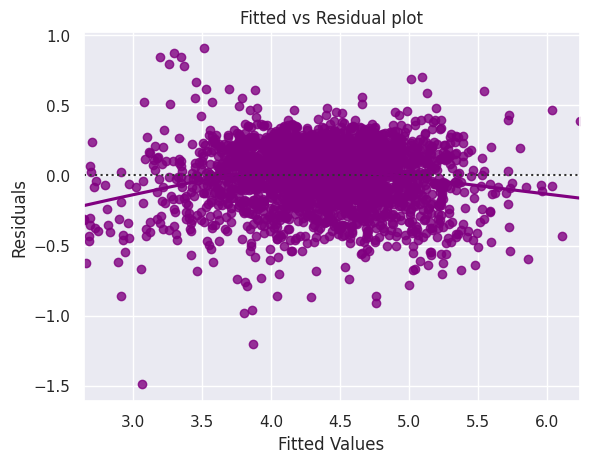

In [66]:
# Plotting the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations:**

- Residuals are centered around zero, which supports the assumption that errors have a mean of zero.

- The residuals appear fairly evenly spread across the range of fitted values, with no clear upward or downward trend.

- However, there is slight curvature in the lowess line (purple curve), indicating a mild non-linear pattern that may not be fully captured by the model.

- Residuals seem independent, as there is no repeating pattern or influence from one point to the next.

- Overall, the plot suggests that linearity and independence assumptions are mostly satisfied, though the slight curvature hints at a possible mild non-linearity.

### 9.3. Test for Normality

**Purpose of the Test**

- In linear regression, residuals should follow a normal distribution to ensure the accuracy of coefficient estimates and their confidence intervals.

- If this assumption is violated, it may signal the presence of outliers or model shortcomings, leading to unreliable inferences.

**Ways to Check Normality**

- Use a histogram of residuals to visually inspect if the distribution is approximately normal.

- A Q-Q plot can help assess if residuals follow a straight line, which would suggest normality.

- Conduct statistical tests like the Shapiro-Wilk test:

  - Null hypothesis: Residuals are normally distributed

  - Alternative hypothesis: Residuals are not normally distributed

**Addressing Non-Normality**

- If residuals are not normally distributed, we can apply transformations to the target variable (e.g., logarithmic, square root) to stabilize variance and improve model fit.









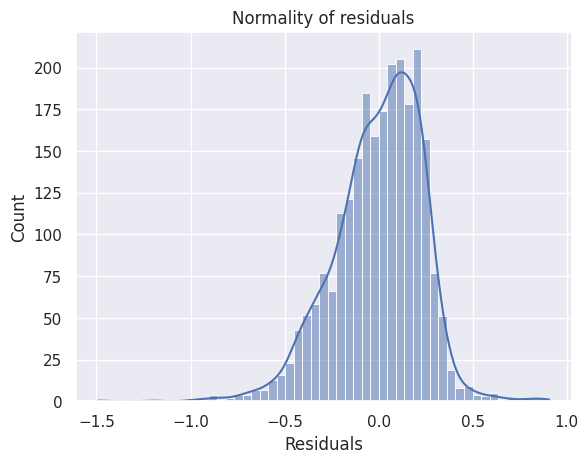

In [67]:
# Plotting the distribution of residuals
sns.histplot(data=df_pred, x = "Residuals", kde = True)
plt.title("Normality of residuals")
plt.show()

- The distribution is approximately bell-shaped and centered around zero, suggesting the residuals are roughly symmetric.

- However, the peak is slightly sharper than a perfect normal distribution, and the tails drop off more quickly, indicating slight kurtosis.

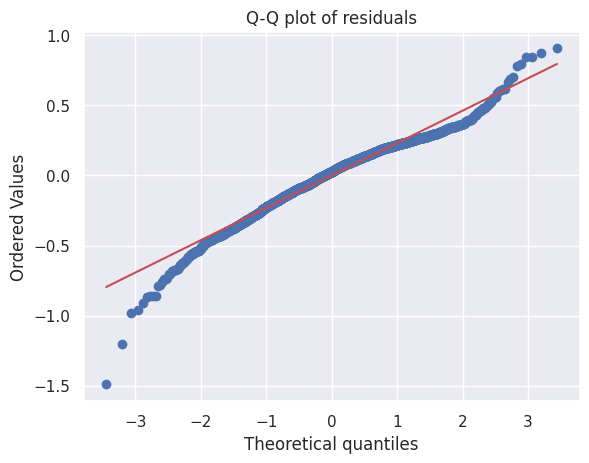

In [68]:
# Plotting a Q-Q plot

stats.probplot(df_pred['Residuals'], dist="norm", plot=pylab)
plt.title("Q-Q plot of residuals")
plt.show()

- Most residuals lie along the straight line, but deviations appear at both ends.

- This suggests departures from normality in the tails, especially for extreme values. The model may slightly underpredict or overpredict at the edges.

In [69]:
# Shapiro-Wilks test
stats.shapiro(df_pred['Residuals'])

ShapiroResult(statistic=np.float64(0.9719718228685327), pvalue=np.float64(2.3770466227150248e-21))

- Since the p-value is far below 0.05 as per the Shapiro-Wilk test, we reject the null hypothesis that the residuals are normally distributed.

**Conclusion**

- Although the residuals appear mostly normal visually, the Q-Q plot and Shapiro-Wilk test indicate mild deviations from normality, especially in the tails.

- These are not severe, but may affect confidence intervals and hypothesis testing slightly.

- Since the model will primarily be used for predicting rather than statistical inferences, we can approximate and accept this distribution as close to being normal.


### 9.4. Test for Heteroscedasticity

**Purpose of the Test**
- In linear regression, it’s important that residuals maintain a constant variance across all levels of the predicted values—this condition is called homoscedasticity.

- If residuals display unequal variance (heteroscedasticity), it can affect the accuracy of standard errors, confidence intervals, and hypothesis tests. This issue is often caused by outliers or missing explanatory variables.

**Ways to Check Homoscedasticity**
- Inspect the residuals vs. fitted values plot. A random, uniform spread of points suggests constant variance. In contrast, patterns like a funnel, cone, or wave shape may indicate heteroscedasticity.

- Run the Goldfeld-Quandt test:

  - Null hypothesis: Residuals are homoscedastic (constant variance)

  - Alternative hypothesis: Residuals are heteroscedastic (non-constant variance)

  - A p-value > 0.05 supports homoscedasticity.

**Addressing Heteroscedasticity**
- If the assumption is not met, we can transform the target variable or adding missing features that may help explain the variance in the residuals.










- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [70]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train4)
lzip(name, test)

[('F statistic', np.float64(1.0553043400320006)),
 ('p-value', np.float64(0.1758910363301999))]

**Inference:**
The p-value (0.1759) is greater than 0.05, so we fail to reject the null hypothesis. This indicates that the residuals are homoscedastic, meaning their variance is constant and the assumption is satisfied.

## 10. Predictions on test data

Since all the assumptions of linear regression have been tested and satisfied, we will proceed with the prediction.

In [71]:
# Predictions on the test set
pred = olsmodel3.predict(X_test4)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.364143
2341,3.696103,3.941673
1913,3.592093,3.768352
688,4.306495,4.11866
650,4.522115,5.115918
2291,4.259294,4.39134
40,4.997685,5.414301
1884,3.875359,4.08923
2538,4.206631,4.049469
45,5.380450,5.296022


**Observations:**
- The predicted values are close to the actual values in most cases (within a range of ±0.2 to ±0.4.), indicating good model performance.

- Given that some values are slightly overestimated while others are slightly underestimated, we can infer that the model is not systemically under- or over-predicting in this sample.

## 11. Final Model

In [72]:
X_train_final = X_train4.copy()
X_test_final = X_test4.copy()

In [73]:
# Fitting the final model
olsmodel_final = sm.OLS(y_train, X_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1254.
Date:                   Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                           20:41:35   Log-Likelihood:                 78.957
No. Observations:                   2417   AIC:                            -135.9
Df Residuals:                       2406   BIC:                            -72.22
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Comparing the Initial and Final Model's Performances:**

- The initial model explained 84.5% of the variance in normalized used price, with an Adjusted R² of 0.842 across 48 predictors. In contrast, the final model, using only 10 carefully selected predictors, still explains 83.9% of the variance, with an Adjusted R² of 0.838.

- The drop in Adjusted R² is just 0.004, despite reducing the number of predictors by nearly 80%.This suggests that many of the original 48 features provided limited or redundant information, and the final model captures the key drivers of price more efficiently.

- Therefore, the final model offers better generalizability, lower risk of overfitting, and greater interpretability, while maintaining comparable predictive power.

**Coefficient Interpretation:**

- A one-unit increase in the normalized new price adds **0.4273** to the predicted used price, making it the most influential predictor in the model.

- Xiaomi devices show the highest brand-related impact, with a **0.0859** increase in normalized price compared to the baseline.

- Nokia phones are priced **0.0725** higher than the baseline brand, suggesting stronger resale value.

- Lenovo phones have a resale price that is **0.0495** higher than the reference brand, indicating a moderate positive brand effect.

- A one-unit increase in screen size leads to a **0.0432** increase in the normalized used price, indicating that larger screens are associated with higher resale value.

- Phones with 4G capability are valued **0.0412** higher than those without, reflecting the demand for modern connectivity features.

- For every additional megapixel in the main camera, the normalized used price increases by **0.0192**, showing that camera quality plays a role in pricing.

- Each extra gigabyte of RAM increases the normalized price by **0.0168**, reflecting the value placed on better performance.

- An increase of one megapixel in the selfie camera raises the predicted price by **0.0129**, suggesting a smaller but still positive effect.

- Each additional year since the device's release **decreases** the normalized used price by **0.0127**, consistent with depreciation over time.

In [74]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, X_train_final, y_train) ## Complete the code to check the performance on train data
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234194,0.183469,0.839015,0.838279,4.400525


In [75]:
# Checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, X_test_final, y_test) ## Complete the code to check performance on test data
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238917,0.185322,0.841739,0.840041,4.511689


- The model performs consistently well on both training and test sets.

- R² and Adjusted R² are nearly identical across datasets, indicating strong generalization with no signs of overfitting or underfitting.

- RMSE and MAE show minimal deviation between training and test data, confirming stable predictive accuracy.

- MAPE remains low (~4.5%), which is excellent for regression tasks involving normalized prices.


## 12. Executive Summary

### 12.1. Overall Conclusion

- We developed a linear regression model to estimate the normalized prices of used phones and tablets using key device attributes like brand, specifications, and original price.

- Starting with 48 variables, we refined the model down to just 10 important predictors with very little drop in performance (Adjusted R² went from 0.842 to 0.838).

- The model performs consistently well on both training and test sets, with R² values around 0.84 and low prediction errors (MAPE around 4.5%), showing it generalizes well to new data.

- We tested all the main regression assumptions, and they were largely met. While the residuals aren’t perfectly normal, this hasn’t impacted the model’s overall reliability.

- The end result is a solid, easy-to-interpret model that aligns closely with how devices are valued in the real world.

### 12.2 Actionable Insights for ReCell

- The original retail price of a device is the biggest factor in predicting its resale value—higher original prices generally lead to higher used prices.

- Features like screen size, RAM, and camera resolution have a meaningful impact on price and should be considered when assessing device value.

- Devices with 4G are more valuable than those without, and while 5G is still uncommon (only 4.4% of devices), its impact may grow over time.

- Android devices dominate the dataset (93%), which reflects the market and supports the model’s focus, but also means iOS predictions may be less accurate.

- The most common brands in the dataset are Samsung, Huawei, and LG, though many devices are labeled as “Others,” making it hard to draw detailed conclusions for those.

- There are clear signs of outliers in both price and device specs that may be influencing predictions and should be reviewed more closely.


### 12.3. Recommendations for ReCell

- Use the model to support pricing decisions for used Android devices, which make up the bulk of the inventory and where the model is most reliable.

- Be cautious when using the model to price iPhones or other less-represented OS types, as these predictions may be less accurate.

- Highlight high-retention brands and desirable specs in the marketing strategy to attract more value-conscious customers.

- Consider updating the model periodically to keep up with shifts in technology (e.g., growing 5G adoption) and customer preferences.

- Take a closer look at the “Others” category for brands—labeling them more specifically could improve future insights and model accuracy.

- Include a clear label for device type (phone vs. tablet) in future data collection. This would improve model accuracy, help distinguish normal variation from outliers, and allow for more refined pricing strategies based on product category.



### 12.4. Limitations of the Model

- The model assumes linear relationships between predictors and price, which may oversimplify more complex interactions in the real world.

- Mild non-normality in residuals was detected, though the large sample size helps mitigate its effect on overall reliability.

- Since 93% of the dataset consists of Android devices, predictions for iOS and other OS types may be less accurate.

- A large number of devices are grouped under “Others” for brand, limiting our ability to draw precise conclusions about those units.

- The dataset does not distinguish between phones and tablets. This may have led the model to misinterpret naturally higher values (e.g., for weight, battery, screen size) as anomalies or distort pricing trends across these product types.

- Finally, outliers may still be influencing the model's error patterns. These should be reviewed to determine if data cleaning or additional filtering is needed.




